In [121]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import scipy.stats as sp
from datetime import datetime,timedelta

In [2]:
all_tracks = pd.read_csv('Features/SpotifyFeatures_All_1990_to_2021.csv')
all_tracks.tail(3)

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
12553,Chasing After You,Ryan Hurd With Maren Morris,91,1,[Timestamp('2021-05-01 00:00:00')],1ZIKpMTRPqhwAoVXWY3tXI,0.596,0.679,-6.395,0.0394,0.723000,0.000000,0.116,0.479,131.912
12554,Go!,Moneybagg Yo Featuring BIG30,96,1,[Timestamp('2021-05-01 00:00:00')],4VYKA63F2fcQnsvfWUpzn9,0.822,0.631,-6.271,0.2540,0.002120,0.000000,0.204,0.561,175.099
12555,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,1,[Timestamp('2021-05-01 00:00:00')],0ky8syPEVEfD7qCxMTW49X,0.814,0.531,-7.560,0.0884,0.000544,0.000007,0.103,0.180,130.020


In [3]:
all_tracks['weeks'] = all_tracks['weeks'].apply(lambda x: x.replace('Timestamp(','')).apply(lambda x: x.replace(')',''))
all_tracks['weeks'] = all_tracks['weeks'].apply(lambda x: x.replace('[','')).apply(lambda x: x.replace(']','')).apply(lambda x: x.split(','))
all_tracks.head(3)

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.063,0.365,101.967
1,Rhythm Nation,Janet Jackson,2,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.375,0.676,109.116
2,Dont Know Much,Linda Ronstadt (Featuring Aaron Neville),2,12,"['1990-01-06', '1990-01-13', '1990-01-20', ...",5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.158,0.267,130.465


In [4]:
all_tracks_exploded = all_tracks.explode('weeks')
all_tracks_exploded['weeks'] = all_tracks_exploded['weeks'].str.replace('00:00:00','')
all_tracks_exploded['weeks'] = pd.to_datetime(all_tracks_exploded['weeks'])
all_tracks_exploded.tail()

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
12551,Paid The Fine,Young Thug & Gunna Featuring Lil Baby & YTB Tr...,77,1,2021-05-01,0GqaZ1L5KAXMNngAZbGvLf,0.484,0.596,-8.523,0.4240,0.029900,0.000000,0.1190,0.210,81.860
12552,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,79,1,2021-05-01,0QULNNd9z5s35entfiiXoa,0.612,0.884,-4.400,0.0459,0.005160,0.000000,0.0997,0.626,119.991
12553,Chasing After You,Ryan Hurd With Maren Morris,91,1,2021-05-01,1ZIKpMTRPqhwAoVXWY3tXI,0.596,0.679,-6.395,0.0394,0.723000,0.000000,0.1160,0.479,131.912
12554,Go!,Moneybagg Yo Featuring BIG30,96,1,2021-05-01,4VYKA63F2fcQnsvfWUpzn9,0.822,0.631,-6.271,0.2540,0.002120,0.000000,0.2040,0.561,175.099
12555,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,1,2021-05-01,0ky8syPEVEfD7qCxMTW49X,0.814,0.531,-7.560,0.0884,0.000544,0.000007,0.1030,0.180,130.020


# Plotting Average Audio Features From 1990 to Today

In [5]:
avg_features = pd.read_csv('Average_Features/All_AvgFeatures_1990_Today.csv')

In [6]:
avg_features['week'] = pd.to_datetime(avg_features['week'])

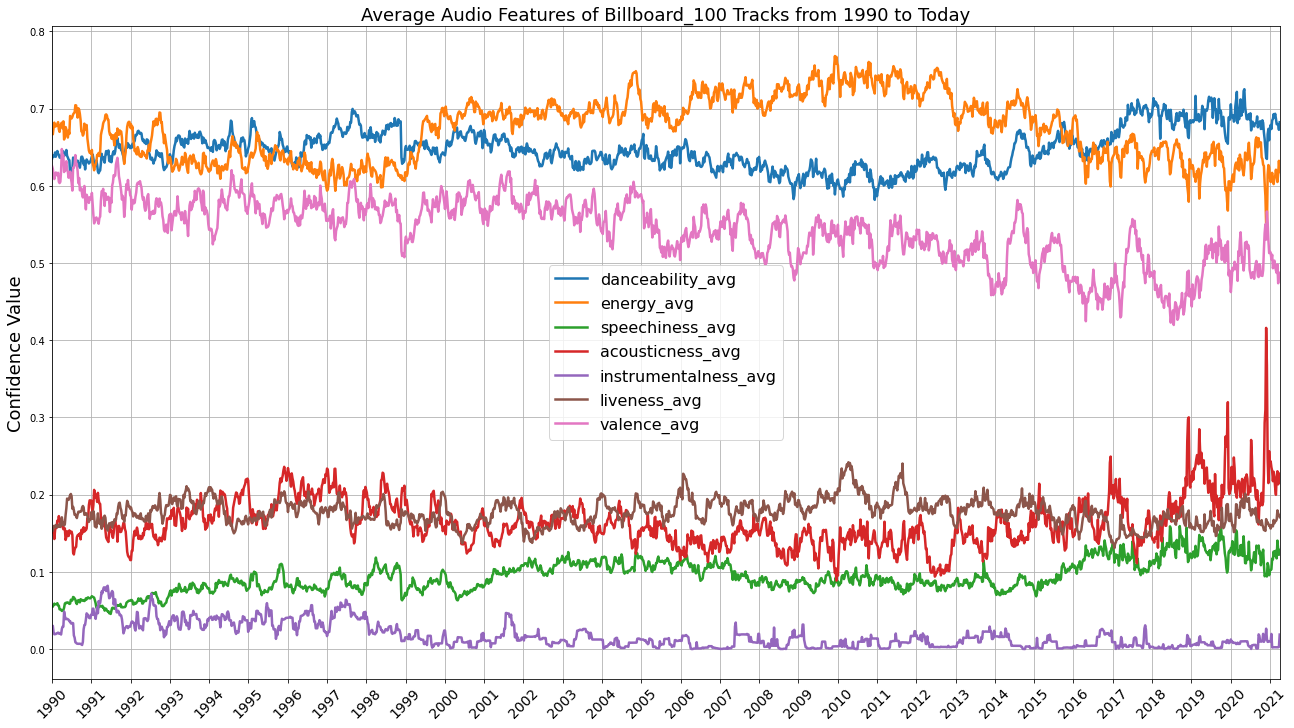

In [7]:
plt.figure(figsize=(22,12))
y_vals = avg_features[['danceability_avg','energy_avg','speechiness_avg','acousticness_avg',
                                   'instrumentalness_avg','liveness_avg','valence_avg']]
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

plt.plot(x_vals, y_vals, label="Audio Features", linewidth=2.5)
plt.legend([i for i in y_vals], loc='center', fontsize=16)


plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks()
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Audio Features of Billboard_100 Tracks from 1990 to Today', fontsize=18)


plt.grid(zorder=3)
plt.show()

In [8]:
avg_features.head()

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
0,0.635219,0.672281,-9.773062,0.054600,0.154677,0.029802,0.155859,0.625260,115.922844,1990-01-06
1,0.638968,0.666684,-9.781326,0.055008,0.151400,0.030139,0.153061,0.621674,116.558505,1990-01-13
2,0.639589,0.675137,-9.552053,0.057159,0.151506,0.021584,0.159429,0.613589,116.782663,1990-01-20
3,0.637883,0.681745,-9.437330,0.058898,0.142577,0.019172,0.159479,0.608713,117.435128,1990-01-27
4,0.643105,0.676611,-9.439842,0.057981,0.153985,0.019497,0.157777,0.613432,118.637379,1990-02-03


# Instrumentalness

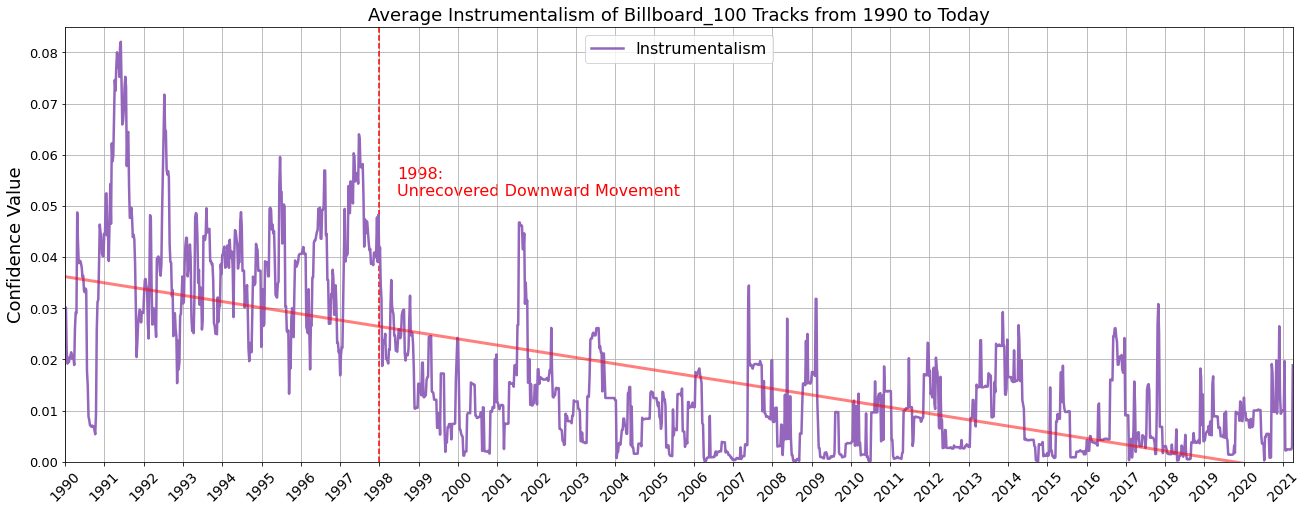

In [9]:
plt.figure(figsize=(22,8))
y_vals = avg_features['instrumentalness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]


low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Instrumentalism", linewidth=2.5, color='#9467bd', alpha=1)

plt.legend(loc='upper center', fontsize=16)

plt.vlines(x_tix[8], color='red', ymin=0, ymax=0.085, linestyles='dashed')


x_lin = np.array(pd.to_datetime(x_vals).values, dtype=float)
y_lin = np.array(y_vals.values, dtype=float)
slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin),max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept


plt.plot(xf1, yf,color='red', lw=3, alpha=0.5)


plt.ylim(0, 0.085)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Instrumentalism of Billboard_100 Tracks from 1990 to Today', fontsize=18)
plt.text(10400, color='red', y=0.052,s='1998:\nUnrecovered Downward Movement', fontsize=16, zorder=1)

plt.grid(zorder=3)
plt.show()

# Speechiness

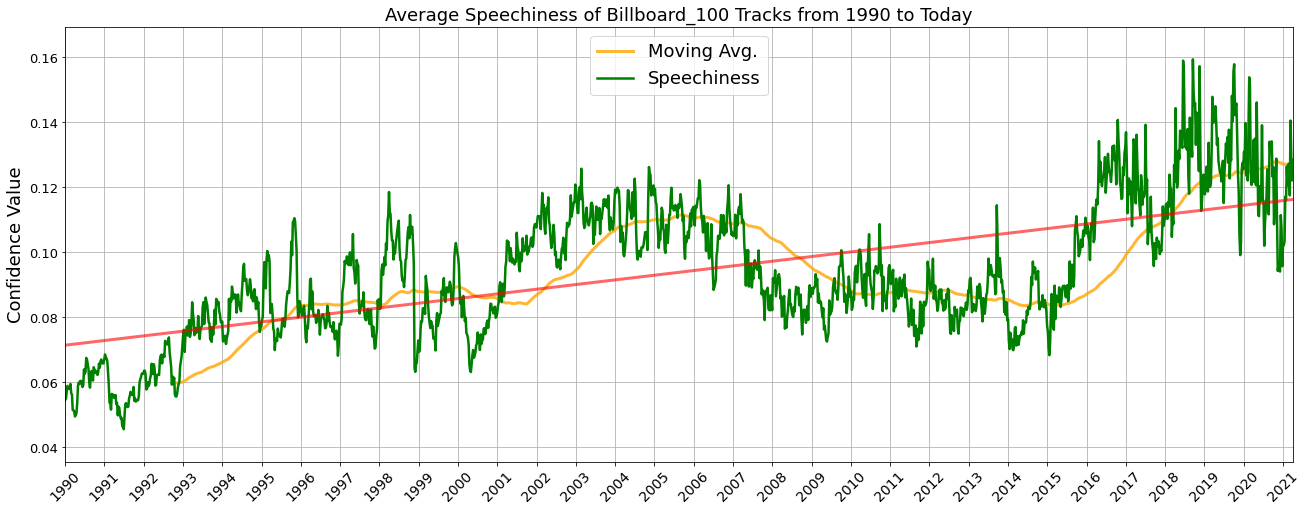

In [10]:
plt.figure(figsize=(22,8))
y_vals = avg_features['speechiness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = avg_features['speechiness_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='orange', alpha=0.8)

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Speechiness", linewidth=2.5, color='green', alpha=1)

plt.legend(loc='upper center', fontsize=18)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['speechiness_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Speechiness of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

# Liveness

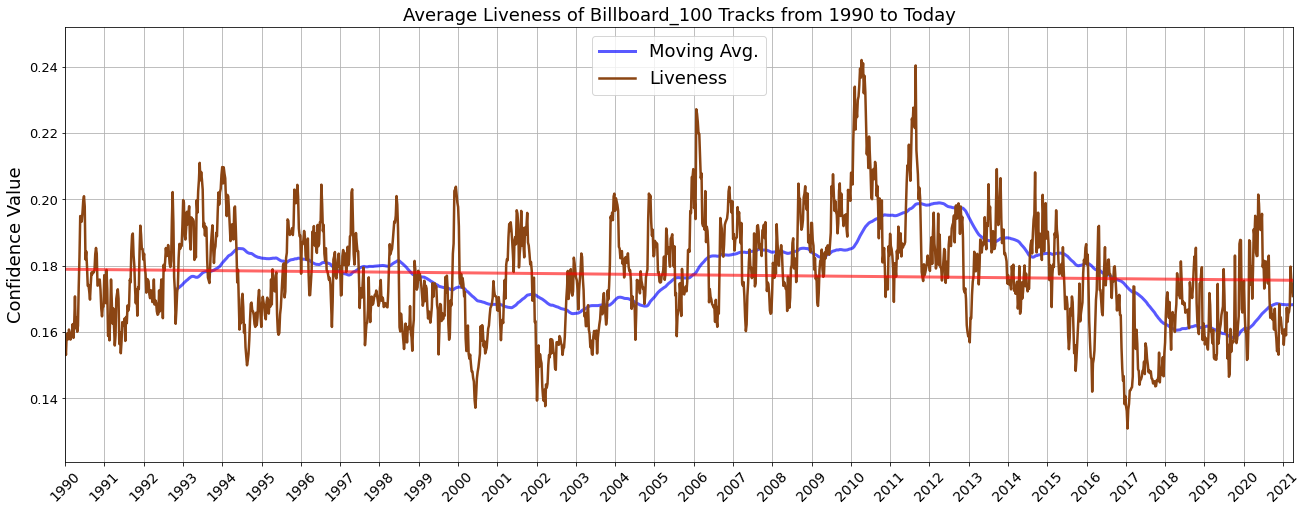

In [11]:
plt.figure(figsize=(22,8))
y_vals = avg_features['liveness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]


low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

roll_avg = avg_features['liveness_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='blue', alpha=0.65)

plt.plot(x_vals, y_vals, label="Liveness", linewidth=2.5, color='saddlebrown', alpha=1)

plt.legend(loc='upper center', fontsize=18)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['liveness_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Liveness of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [12]:
liveness_range = avg_features[(avg_features['week'] >= '2002-01-01')&
                             (avg_features['week'] <='2012-01-01')].reset_index(drop=True)

In [13]:
liveness_range['liveness_avg'].describe()

count    522.000000
mean       0.183720
std        0.018821
min        0.137612
25%        0.172240
50%        0.182652
75%        0.193997
max        0.241999
Name: liveness_avg, dtype: float64

In [14]:
peaks = []
valleys = []
for i in range(2002,2012):
    x = avg_features[(avg_features['week'] > f"{i}-01-01")&(avg_features['week'] < f"{i+1}-01-01")]
    
    peaks.append((max(list(x['liveness_avg'])), x['week'].loc[(x['liveness_avg']==max(x['liveness_avg']))]))
    valleys.append((min(list(x['liveness_avg'])), x['week'].loc[(x['liveness_avg']==min(x['liveness_avg']))]))
    

In [15]:
line = []

for i in range(2002,2013):
    x = avg_features[(avg_features['week'] > f"{i}-01-01")&(avg_features['week'] < f"{i+1}-01-01")]
    
    min_week = (x['week'].loc[(x['liveness_avg']==min(x['liveness_avg']))], x['week'].loc[(x['liveness_avg']==min(x['liveness_avg']))].index)
    max_week = (x['week'].loc[(x['liveness_avg']==max(x['liveness_avg']))], x['week'].loc[(x['liveness_avg']==max(x['liveness_avg']))].index)
    
    if min_week[1] < max_week[1]:
        line.append((min(list(x['liveness_avg'])), min_week[0]))
        line.append((max(list(x['liveness_avg'])), max_week[0]))
    else:
        line.append((max(list(x['liveness_avg'])), max_week[0]))
        line.append((min(list(x['liveness_avg'])), min_week[0]))

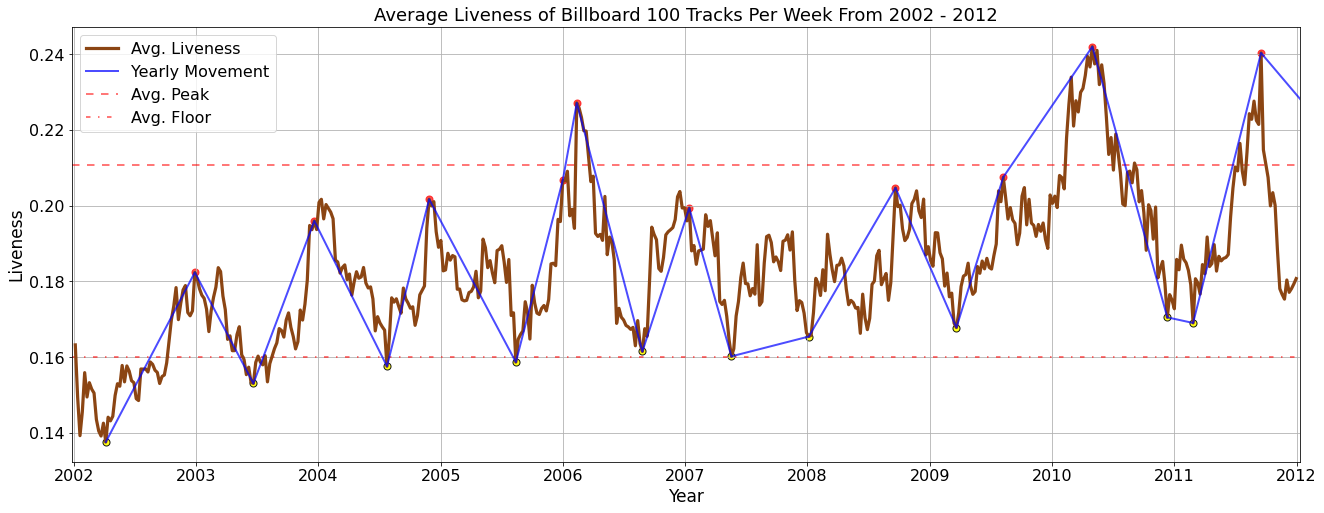

In [16]:
plt.figure(figsize=(22,8))

avg_peak = np.mean([i[0] for i in peaks])
avg_valley = np.mean([i[0] for i in valleys])

x_vals = liveness_range['week']
y_vals = liveness_range['liveness_avg']

plt.plot(x_vals, y_vals, linewidth=3.2, color='saddlebrown', label='Avg. Liveness')

plt.scatter([i[1] for i in peaks], [i[0] for i in peaks], marker='o' ,color='red', s=50, alpha=0.7)
plt.scatter([i[1] for i in valleys], [i[0] for i in valleys], marker='o', color='yellow', edgecolors='black', s=50, alpha=0.9)

plt.plot([i[1] for i in line], [i[0] for i in line], color='blue', linewidth=2, alpha=0.7, label='Yearly Movement')

plt.hlines(avg_peak, min(x_vals)-timedelta(days=10),max(x_vals)+timedelta(days=10), color='r', linestyles=(0,(5,5)), alpha=0.7, label='Avg. Peak')
plt.hlines(avg_valley, min(x_vals)-timedelta(days=10),max(x_vals)+timedelta(days=10), color='r', linestyles=(0,(3,5,1,5)), alpha=0.7, label='Avg. Floor')

plt.title('Average Liveness of Billboard 100 Tracks Per Week From 2002 - 2012', fontsize=18)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Liveness',fontsize=17)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(min(x_vals)-timedelta(days=10),max(x_vals)+timedelta(days=10))

plt.legend(fontsize=16)
plt.grid(zorder=3)
plt.show()

In [17]:
last_10years = avg_features[avg_features['week'] >= '2010-01-01'].reset_index(drop=True)
last_10years['week']

0     2010-01-02
1     2010-01-09
2     2010-01-16
3     2010-01-23
4     2010-01-30
         ...    
587   2021-04-03
588   2021-04-10
589   2021-04-17
590   2021-04-24
591   2021-05-01
Name: week, Length: 592, dtype: datetime64[ns]

# Acousticness

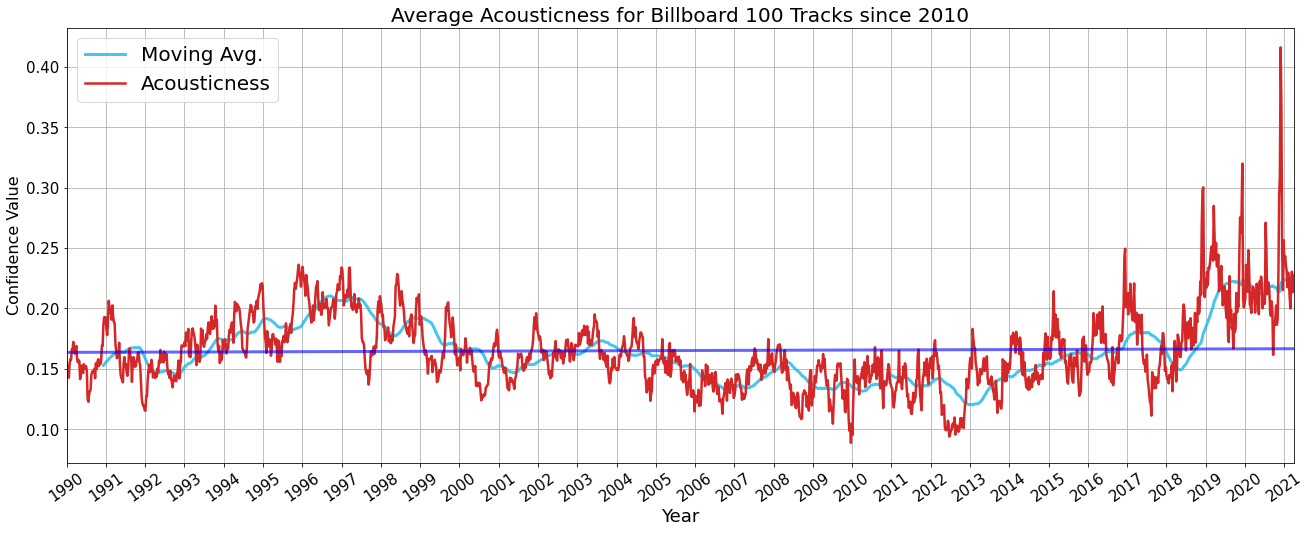

In [18]:
plt.figure(figsize=(22,8))

y_vals = avg_features['acousticness_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = avg_features['acousticness_avg'].rolling(50).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='#16B8E9', alpha=0.8)

plt.plot(avg_features['week'], y_vals, label="Acousticness", linewidth=2.5, color='C3')

y = np.array(avg_features['acousticness_avg'].values, dtype=float)
x = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)

xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)

yf = (slope*xf)+intercept

plt.plot(xf1, yf, color='blue', lw=3, alpha=0.6)

plt.title('Average Acousticness for Billboard 100 Tracks since 2010', fontsize=20)
plt.ylabel('Confidence Value', fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=35, fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=20)

plt.grid(zorder=3)
plt.show()

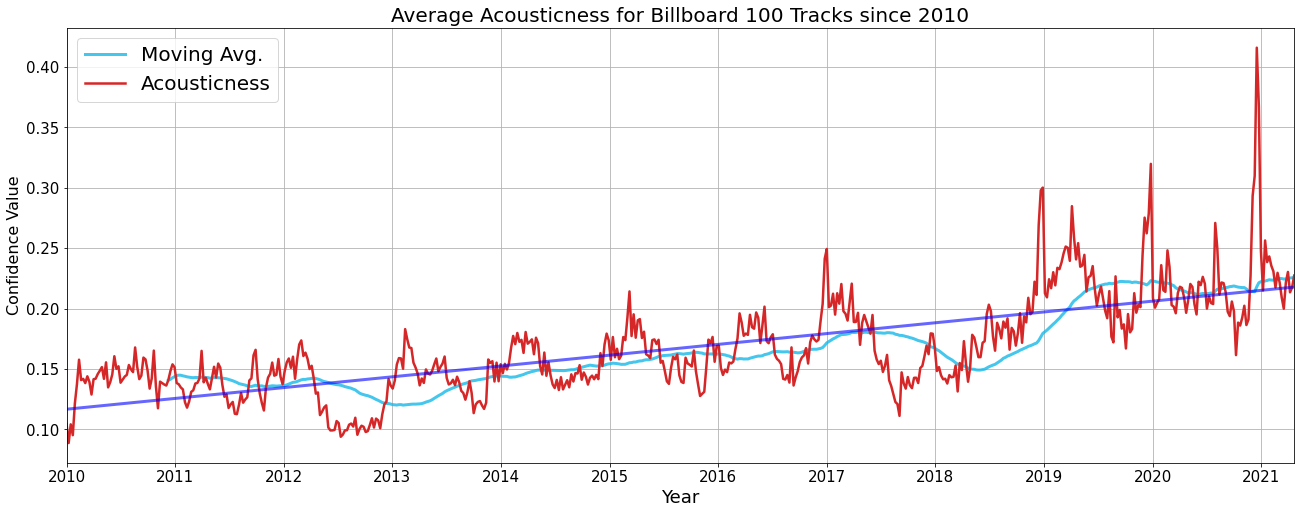

In [19]:
plt.figure(figsize=(22,8))

y_vals = last_10years['acousticness_avg']
x_vals = [i for i in last_10years['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = last_10years['acousticness_avg'].rolling(50).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='#16B8E9', alpha=0.8)

plt.plot(last_10years['week'], y_vals, label="Acousticness", linewidth=2.5, color='C3')

y = np.array(last_10years['acousticness_avg'].values, dtype=float)
x = np.array(pd.to_datetime(last_10years['week']).values, dtype=float)
slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)

xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)

yf = (slope*xf)+intercept

plt.plot(xf1, yf, color='blue', lw=3, alpha=0.6)

plt.title('Average Acousticness for Billboard 100 Tracks since 2010', fontsize=20)
plt.ylabel('Confidence Value', fontsize=16)
plt.xlabel('Year', fontsize=18)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix, x_tix_lab, rotation=0, fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=20)
plt.grid(zorder=3)
plt.show()

# Valence

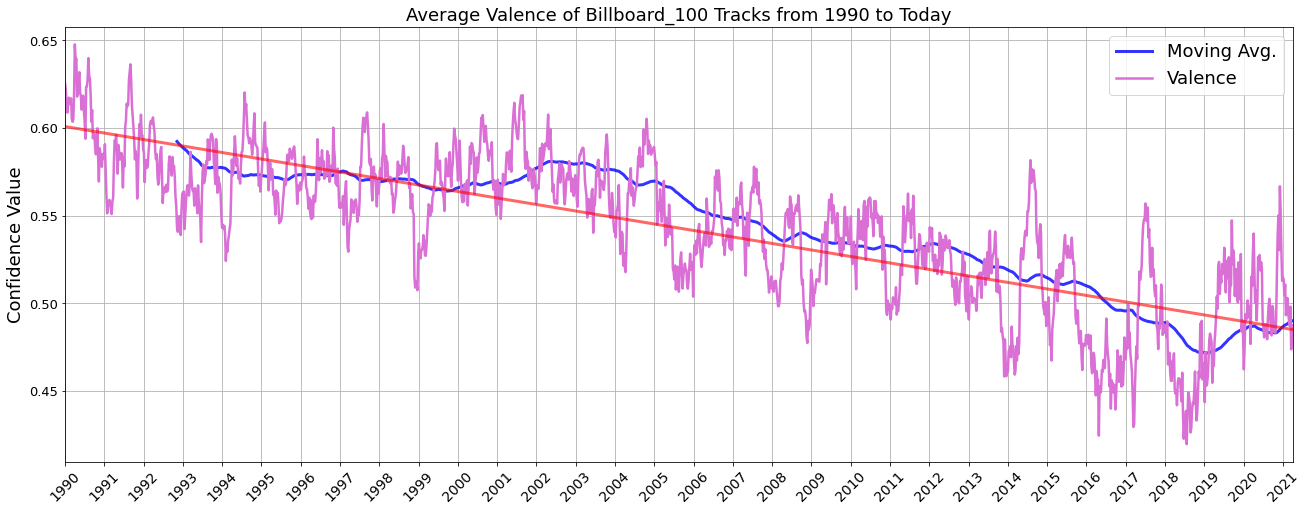

In [20]:
plt.figure(figsize=(22,8))
y_vals = avg_features['valence_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]


roll_avg = avg_features['valence_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='blue', alpha=0.8)

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Valence", linewidth=2.5, color='orchid', alpha=1)

plt.legend(loc='upper right', fontsize=18)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['valence_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Valence of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [21]:
def valence_change(df, year_floor=1990, year_cap=2022):
    min_max_peryear = {'year':[],
                      'min_valence':[],
                      'max_valence':[]}

    for i in range(year_floor,year_cap):
        one_year = df['valence_avg'][(df['week']>f"{i}-01-01") &
                                              (df['week'] <= f"{i+1}-01-01")]
        min_max_peryear['year'].append(i)
        min_max_peryear['min_valence'].append(min(one_year))
        min_max_peryear['max_valence'].append(max(one_year))
    return min_max_peryear


In [22]:
happiness_change = pd.DataFrame(valence_change(avg_features))
happiness_change['abs_change'] = happiness_change['max_valence'] - happiness_change['min_valence']
happiness_change[(happiness_change['year']==1990) | (happiness_change['year'] >= 2015)]

,year,min_valence,max_valence,abs_change
0,1990,0.569458,0.647611,0.078153
25,2015,0.462032,0.538920,0.076888
26,2016,0.424610,0.491364,0.066754
27,2017,0.429540,0.556930,0.127390
28,2018,0.419758,0.489705,0.069947
29,2019,0.443699,0.547300,0.103601
30,2020,0.462371,0.550042,0.087671
31,2021,0.473799,0.566739,0.092940


In [23]:
happiness_change[['min_valence','max_valence','abs_change']].describe()


,min_valence,max_valence,abs_change
count,32.000000,32.000000,32.000000
mean,0.502309,0.579770,0.077460
std,0.041986,0.036592,0.019194
min,0.419758,0.489705,0.044227
25%,0.470942,0.559492,0.066877
50%,0.506415,0.585378,0.075894
75%,0.539264,0.605385,0.087460
max,0.569458,0.647611,0.127390


In [24]:
# 1990-2021 Valence Averages
print(f"Average Mean-Value for Valence: {avg_features['valence_avg'].mean()}\n"
      f"Average Change/Year: {happiness_change['abs_change'].mean()}\n"
      f"Average Percent Change/Year: {round(100 * happiness_change['abs_change'].mean()/avg_features['valence_avg'].mean(), 2)}%")

Average Mean-Value for Valence: 0.5429158804132908
Average Change/Year: 0.07746003011712778
Average Percent Change/Year: 14.27%


In [25]:
pre_volatility = avg_features[avg_features['week'] <= '2014-01-01']
happiness_filtered = pd.DataFrame(valence_change(avg_features,1990, 2014))
happiness_filtered['abs_change'] = happiness_filtered['max_valence'] - happiness_filtered['min_valence']

# 1990-2014 Valence Averages
print(f"Average Mean-Value for Valence: {pre_volatility['valence_avg'].mean()}\n"
      f"Average Change/Year: {happiness_filtered['abs_change'].mean()}\n"
      f"Average Percent Change/Year: {round(100 * happiness_filtered['abs_change'].mean()/avg_features['valence_avg'].mean(), 2)}%")

Average Mean-Value for Valence: 0.558598218572103
Average Change/Year: 0.07210188106526132
Average Percent Change/Year: 13.28%


In [26]:
pre_volatility = avg_features[(avg_features['week'] >= '2014-01-01')]
happiness_filtered = pd.DataFrame(valence_change(avg_features, 2014))
happiness_filtered['abs_change'] = happiness_filtered['max_valence'] - happiness_filtered['min_valence']

# 2014-Today Valence Averages
print(f"Average Mean-Value for Valence: {pre_volatility['valence_avg'].mean()}\n"
      f"Average Change/Year: {happiness_filtered['abs_change'].mean()}\n"
      f"Average Percent Change/Year: {round(100 * happiness_filtered['abs_change'].mean()/avg_features['valence_avg'].mean(), 2)}%")

Average Mean-Value for Valence: 0.4916923685681884
Average Change/Year: 0.09353447727272718
Average Percent Change/Year: 17.23%


# Danceability

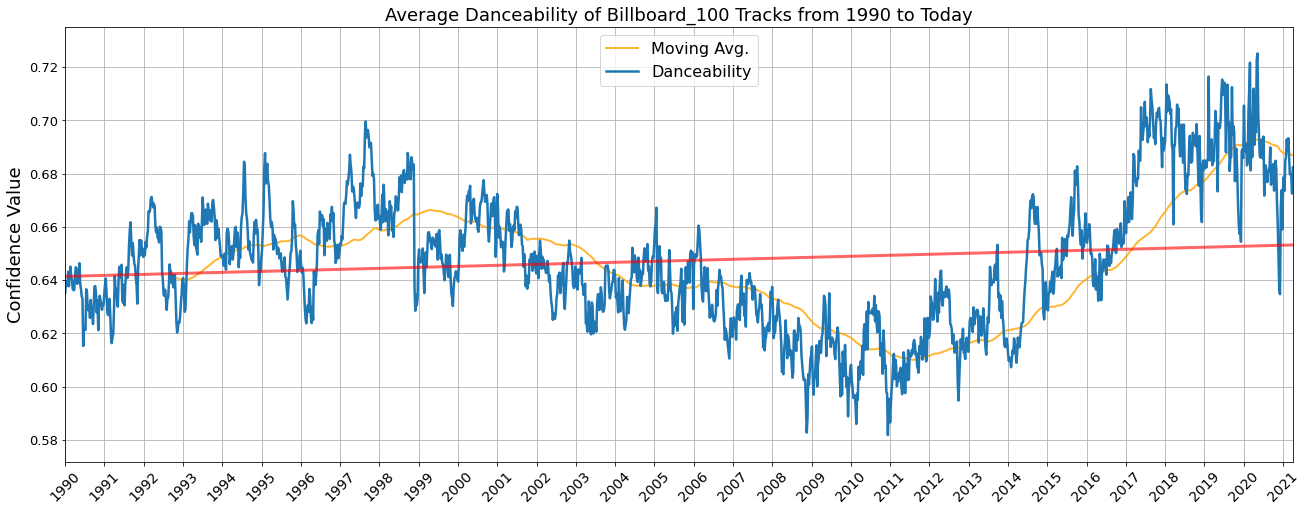

In [27]:
plt.figure(figsize=(22,8))
y_vals = avg_features['danceability_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

roll_avg = avg_features['danceability_avg'].rolling(150).mean()
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=2, color='orange', alpha=0.8)


low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, y_vals, label="Danceability", linewidth=2.5, color='C0', alpha=1)

plt.legend(loc='upper center', fontsize=16)


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['danceability_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Danceability of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [28]:
all_tracks_exploded = all_tracks_exploded.dropna()
all_tracks_exploded['peak_rank'] = pd.to_numeric(all_tracks_exploded['peak_rank'])
x = all_tracks_exploded[all_tracks_exploded['peak_rank']<=10].mean()['danceability']
y = all_tracks_exploded[all_tracks_exploded['peak_rank']>=10].mean()['danceability']
print(f"Avg. Danceability for Tracks with Peak Rank 1-10: {x}\n"
     f"Avg. Danceability for Tracks with Peak Ranks lower than 10: {y}")

<ipython-input-28-24c3c272519f>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  x = all_tracks_exploded[all_tracks_exploded['peak_rank']<=10].mean()['danceability']
<ipython-input-28-24c3c272519f>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  y = all_tracks_exploded[all_tracks_exploded['peak_rank']>=10].mean()['danceability']


Avg. Danceability for Tracks with Peak Rank 1-10: 0.6705788325849904
Avg. Danceability for Tracks with Peak Ranks lower than 10: 0.6460654726895508


# Energy

In [29]:
dance = avg_features['danceability_avg'].rolling(75).mean()
energy = avg_features['energy_avg'].rolling(75).mean()
together = pd.DataFrame({'dance':dance,
                       'energy':energy,
                       'week':avg_features['week']})
together = together.dropna()
cross_points = [(i['week'], i['dance']) for h,i in together.iterrows() if round(i['dance'],3)==round(i['energy'],3)]
cross_points

[(Timestamp('1993-06-26 00:00:00'), 0.6484758502180255),
 (Timestamp('2000-02-12 00:00:00'), 0.6527048294474694),
 (Timestamp('2016-12-31 00:00:00'), 0.6540374666666667)]

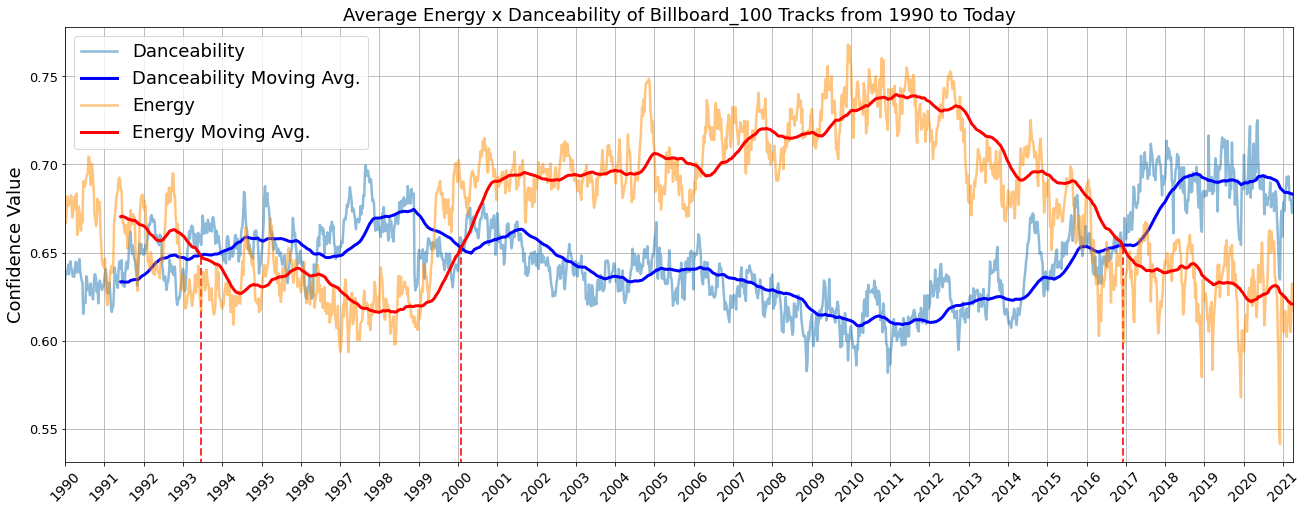

In [30]:
rolling_window = 75
d_y_vals = avg_features['danceability_avg']
d_y_rolling = avg_features['danceability_avg'].rolling(rolling_window).mean()
e_y_rolling = avg_features['energy_avg'].rolling(rolling_window).mean()


plt.figure(figsize=(22,8))
y_vals = avg_features['energy_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, d_y_vals, label='Danceability', linewidth=2.5, alpha=0.5)
plt.plot(x_vals, d_y_rolling, linewidth=3, color='blue', label='Danceability Moving Avg.')

plt.plot(x_vals, y_vals, label="Energy", linewidth=2.5, color='darkorange', alpha=0.5)

plt.plot(x_vals, e_y_rolling, linewidth=3, color='red',label='Energy Moving Avg.')
plt.legend(loc='upper left', fontsize=18)

for i in range(len(cross_points)):
    plt.vlines(cross_points[i][0], linewidth=2, color="red", alpha=0.8, ymin=0, ymax=cross_points[i][1], linestyles='dashed')


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Energy x Danceability of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

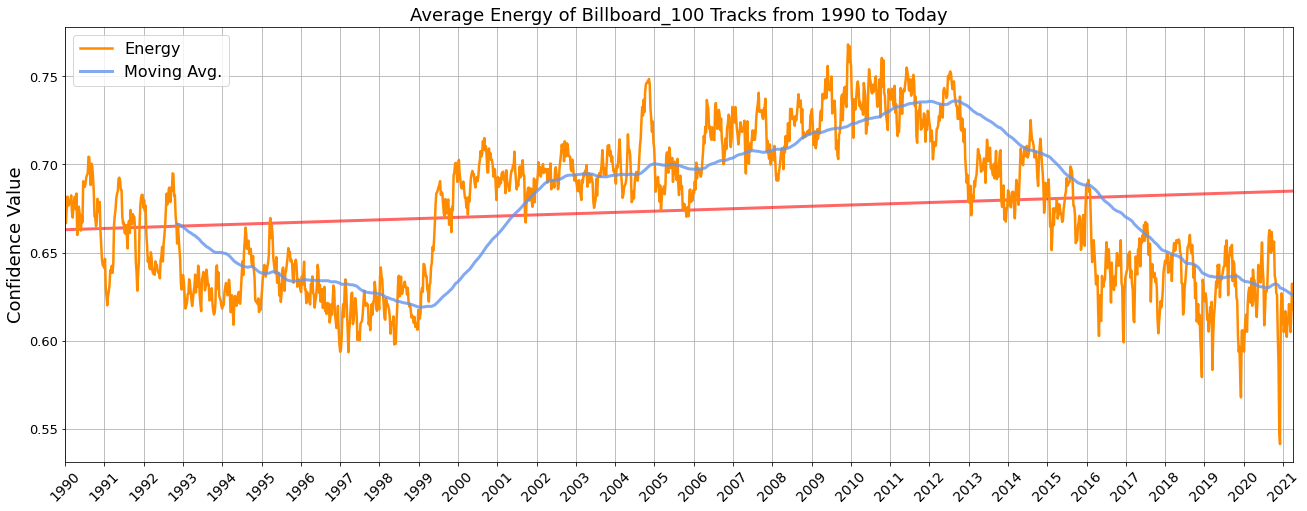

In [31]:
plt.figure(figsize=(22,8))
y_vals = avg_features['energy_avg']
x_vals = [i for i in avg_features['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]
roll_avg = avg_features['energy_avg'].rolling(150).mean()


x_lin = np.array(pd.to_datetime(avg_features['week']).values, dtype=float)
y_lin = np.array(avg_features['energy_avg'].values, dtype=float)

slope, intercept, r_val, p_val, std_err = sp.linregress(x_lin, y_lin)
xf = np.linspace(min(x_lin), max(x_lin),100)
xf1 = pd.to_datetime(xf)
yf = (slope*xf) + intercept

plt.plot(xf1, yf, color='red', lw=3, alpha=0.6)
plt.plot(x_vals, y_vals, label="Energy", linewidth=2.5, color='darkorange', alpha=1)
plt.plot(x_vals, roll_avg, label='Moving Avg.', linewidth=3, color='cornflowerblue', alpha=0.8)
plt.legend(loc='upper left', fontsize=16)


plt.ylim(min(y_vals)-0.01, max(y_vals)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Energy of Billboard_100 Tracks from 1990 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [32]:
twen15_to_today = avg_features[avg_features['week']>='2015-01-01']


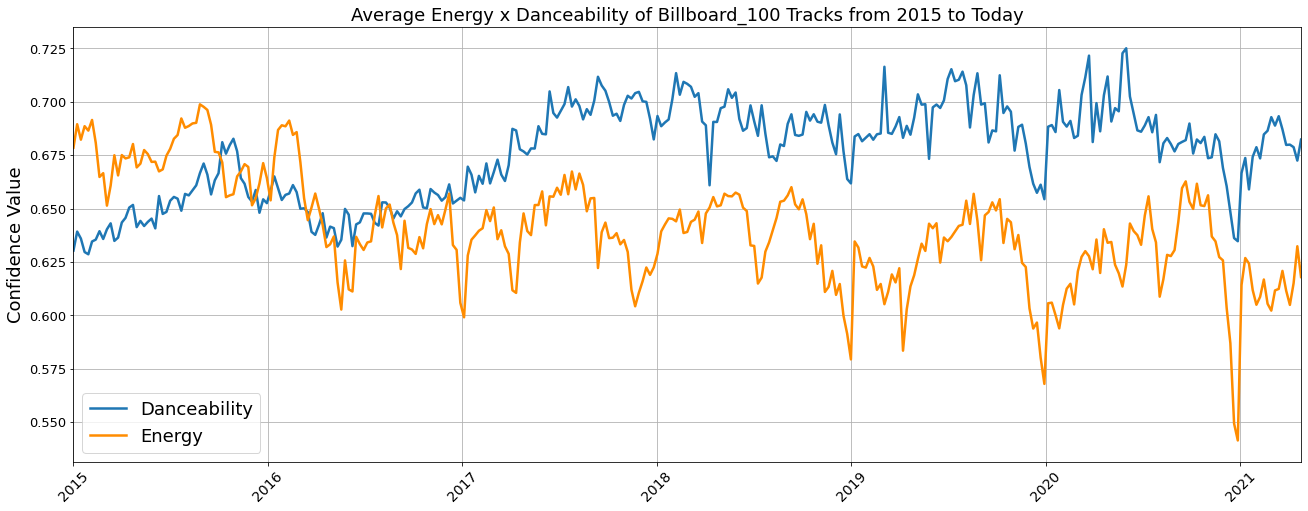

In [33]:

plt.figure(figsize=(22,8))
energy = twen15_to_today['energy_avg']
dance = twen15_to_today['danceability_avg']
x_vals = [i for i in twen15_to_today['week']]
x_tix = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_tix_lab = [str(i).split('-')[0] for i in x_tix]

low_res_y = [j for i,j in enumerate(y_vals) if i%52==0]
low_res_x = [j for i,j in enumerate(x_vals) if i%52==0]

plt.plot(x_vals, dance, label='Danceability', linewidth=2.5, alpha=1)

plt.plot(x_vals, energy, label="Energy", linewidth=2.5, color='darkorange', alpha=1)

plt.legend(loc='lower left', fontsize=18)


plt.ylim(min(energy)-0.01, max(dance)+0.01)
plt.xlim(min(x_vals),max(x_vals))
plt.xticks(x_tix,[i for i in x_tix_lab], rotation=45, fontsize=14)
plt.yticks(fontsize='13')
plt.ylabel('Confidence Value', fontsize=18)
plt.title('Average Energy x Danceability of Billboard_100 Tracks from 2015 to Today', fontsize=18)

plt.grid(zorder=3)
plt.show()

In [34]:
#peak energy week in 2009
avg_features['week'][avg_features['energy_avg']==max(avg_features['energy_avg'])]

1041   2009-12-26
Name: week, dtype: datetime64[ns]

In [35]:
energy = all_tracks_exploded[(all_tracks_exploded['weeks'] =='2009-12-26')].sort_values('energy', ascending=False)
energy

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
6877,Twang,George Strait,100,1,2009-12-26,10Jl8nC5i4idX63nUk3mRj,0.561,0.956,-3.331,0.0799,0.279000,0.000007,0.0801,0.780,158.621
6810,If You Only Knew,Shinedown,92,7,2009-12-26,0CkSF2TAqIu8TJaVwwAOnT,0.449,0.956,-4.011,0.0398,0.000347,0.000000,0.3250,0.321,97.011
6734,Empire State Of Mind,Jay-Z + Alicia Keys,50,14,2009-12-26,2igwFfvr1OAGX9SKDCPBwO,0.491,0.956,-1.538,0.3920,0.029500,0.000000,0.4600,0.811,173.585
6725,I Will Not Bow,Breaking Benjamin,40,15,2009-12-26,2yXyz4NLTZx9CLdXfLTp5E,0.533,0.955,-3.708,0.0653,0.000165,0.000014,0.3800,0.550,107.984
6770,I Can Transform Ya,Chris Brown Featuring Lil Wayne & Swizz Beatz,52,10,2009-12-26,7n6TT5TDeS0A1DqEtSdapf,0.541,0.953,-4.229,0.1070,0.048000,0.000000,0.1920,0.856,111.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6688,Sexy Chick,David Guetta Featuring Akon,56,19,2009-12-26,4MKzCHlZvkwJOQRNkdw4zq,0.809,0.562,-7.694,0.0534,0.081600,0.000418,0.1050,0.798,130.003
6786,Papers,Usher,92,9,2009-12-26,77fP7UixHMYEIFT8NS92Ul,0.802,0.556,-5.395,0.0418,0.033900,0.000000,0.0958,0.158,120.047
6865,How Low,Ludacris,13,1,2009-12-26,1WtTLtofvcjQM3sXSMkDdX,0.785,0.498,-6.977,0.0533,0.002480,0.000001,0.2240,0.418,143.960
6800,Russian Roulette,Rihanna,100,8,2009-12-26,3rMsX63C0IZVnOT5LGYoTH,0.480,0.486,-5.754,0.0447,0.046000,0.000000,0.1070,0.265,80.051


In [36]:
energy[energy['energy'] >= 0.8].count()['song']

40

In [37]:
all_tracks_exploded = all_tracks.explode('weeks')
all_tracks_exploded['weeks'] = pd.to_datetime(all_tracks_exploded['weeks'])
all_tracks_exploded

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,1990-01-06,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-13,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-20,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-01-27,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
0,Another Day In Paradise,Phil Collins,1,9,1990-02-03,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.736000,0.002690,0.0630,0.365,101.967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12551,Paid The Fine,Young Thug & Gunna Featuring Lil Baby & YTB Tr...,77,1,2021-05-01,0GqaZ1L5KAXMNngAZbGvLf,0.484,0.596,-8.523,0.4240,0.029900,0.000000,0.1190,0.210,81.860
12552,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,79,1,2021-05-01,0QULNNd9z5s35entfiiXoa,0.612,0.884,-4.400,0.0459,0.005160,0.000000,0.0997,0.626,119.991
12553,Chasing After You,Ryan Hurd With Maren Morris,91,1,2021-05-01,1ZIKpMTRPqhwAoVXWY3tXI,0.596,0.679,-6.395,0.0394,0.723000,0.000000,0.1160,0.479,131.912
12554,Go!,Moneybagg Yo Featuring BIG30,96,1,2021-05-01,4VYKA63F2fcQnsvfWUpzn9,0.822,0.631,-6.271,0.2540,0.002120,0.000000,0.2040,0.561,175.099


In [38]:
liveness_cycles = all_tracks_exploded[(all_tracks_exploded['weeks'] >= '2010-01-01') &
                                     (all_tracks_exploded['weeks'] <= '2010-06-01')].dropna()
f = liveness_cycles[['song','artist','weeks','spotify_id','liveness']][liveness_cycles['liveness']>0.4].sort_values('liveness', ascending=False)
f[['song','weeks']].groupby('weeks').count()

,song
weeks,
2010-01-02,9
2010-01-09,9
2010-01-16,10
2010-01-23,12
2010-01-30,12
2010-02-06,11
2010-02-13,13
2010-02-20,13
2010-02-27,16


In [39]:
liveness_sorted = avg_features.sort_values('liveness_avg', ascending=False)
liveness_sorted

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
1059,0.60514,0.73123,-5.24400,0.092796,0.151549,0.001407,0.241999,0.547040,120.50709,2010-05-01
1061,0.60441,0.72818,-5.26146,0.086001,0.155467,0.001384,0.241025,0.536000,119.69835,2010-05-15
1131,0.61189,0.73831,-5.27931,0.077504,0.142264,0.008828,0.240348,0.520407,120.84953,2011-09-17
1057,0.60537,0.73558,-5.10885,0.100780,0.145758,0.003691,0.239422,0.536730,120.73982,2010-04-17
1060,0.61530,0.73370,-5.15386,0.088580,0.141830,0.001406,0.237446,0.537150,120.93015,2010-05-08
...,...,...,...,...,...,...,...,...,...,...
1411,0.65759,0.63745,-6.56749,0.136938,0.212296,0.009059,0.137610,0.471436,121.52268,2017-01-28
545,0.66294,0.68694,-6.58768,0.069215,0.137515,0.009030,0.137135,0.568841,115.47206,2000-06-24
1414,0.67115,0.64929,-6.24375,0.121039,0.204049,0.009085,0.136593,0.499347,122.51715,2017-02-18
1412,0.66533,0.63960,-6.53461,0.128212,0.195004,0.009136,0.136176,0.477457,120.18118,2017-02-04


In [40]:
liveness_counts = all_tracks_exploded[(all_tracks_exploded['liveness']>0.4)].groupby('weeks').count()['song'].reset_index(drop=False)
liveness_counts = liveness_counts.rename(columns={'song':'hi_liveness_count'})
liveness_counts

,weeks,hi_liveness_count
0,1990-01-06,3
1,1990-01-13,2
2,1990-01-20,3
3,1990-01-27,3
4,1990-02-03,3
...,...,...
1620,2021-04-03,6
1621,2021-04-10,7
1622,2021-04-17,6
1623,2021-04-24,5


In [41]:
liveness_avg_counts = avg_features.merge(liveness_counts, how='right', left_on='week', right_on='weeks')
liveness_avg_counts = liveness_avg_counts.drop(['danceability_avg','energy_avg','loudness_avg',
                                                'speechiness_avg','acousticness_avg','instrumentalness_avg',
                                                'valence_avg','tempo_avg','weeks'], axis=1)
liveness_avg_counts.sort_values('hi_liveness_count', ascending=False)

,liveness_avg,week,hi_liveness_count
1061,0.241025,2010-05-15,18
1055,0.230984,2010-04-03,17
1064,0.232302,2010-06-05,17
1063,0.237211,2010-05-29,17
1057,0.239422,2010-04-17,17
...,...,...,...
1414,0.138294,2017-02-25,1
709,0.160254,2003-08-16,1
708,0.158297,2003-08-09,1
707,0.153502,2003-08-02,1


In [42]:
liveness_avg_counts['week'] = pd.to_datetime(liveness_avg_counts['week'])

In [43]:
liveness_avg_counts['hi_liveness_count'].describe()

count    1625.000000
mean        6.160000
std         2.829777
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        18.000000
Name: hi_liveness_count, dtype: float64

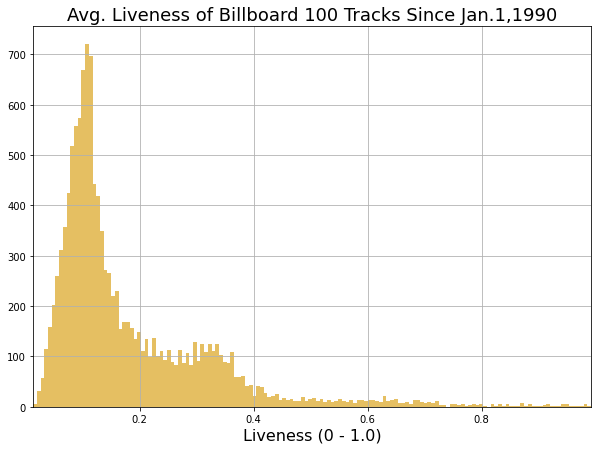

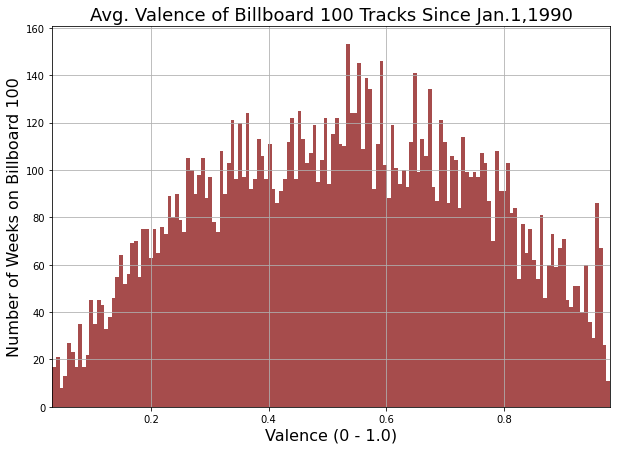

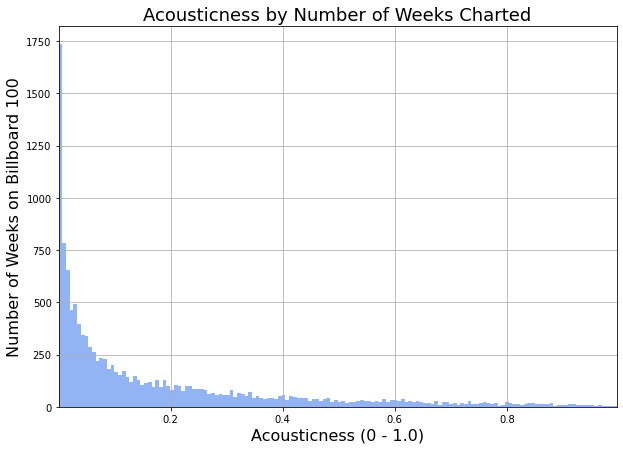

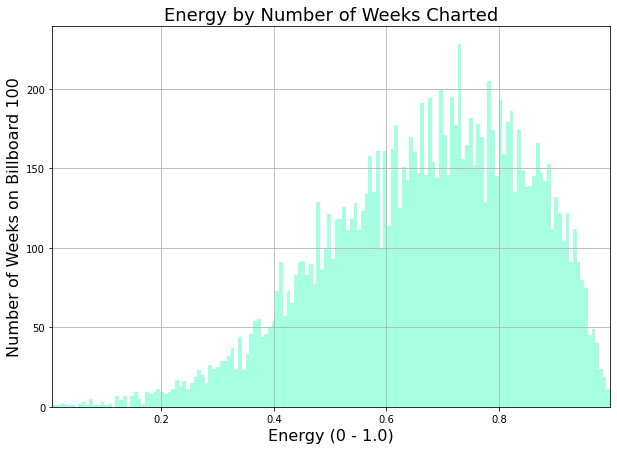

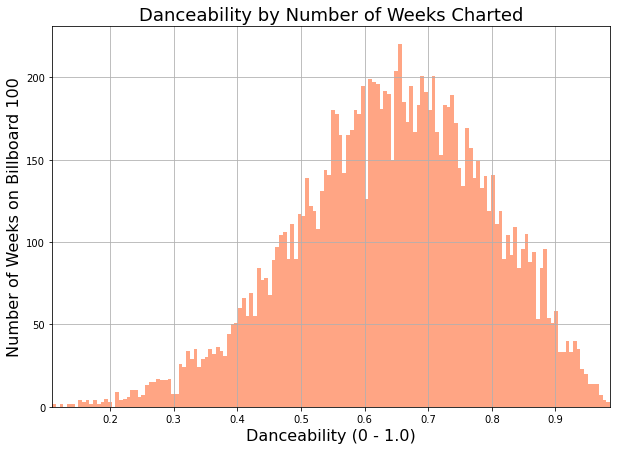

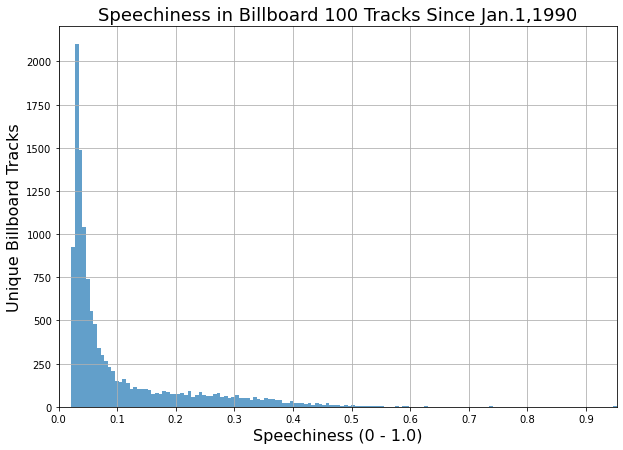

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
fig, val = plt.subplots(figsize=(10,7))
fig, acous = plt.subplots(figsize=(10,7))
fig, eng = plt.subplots(figsize=(10,7))
fig, dance = plt.subplots(figsize=(10,7))
fig, speech = plt.subplots(figsize=(10,7))



liveness = all_tracks['liveness']
ax.hist(liveness, bins=150, alpha=0.7, color='goldenrod', histtype='stepfilled')
ax.grid(zorder=3)

ax.set_xlim(min(liveness), max(liveness))

ax.set_title('Avg. Liveness of Billboard 100 Tracks Since Jan.1,1990', fontsize=18)
ax.set_xlabel('Liveness (0 - 1.0)', fontsize=16)
acous.set_ylabel('Frequency', fontsize=16)


#-----------------------------------------------

valence = all_tracks['valence']
val.hist(valence, bins=150, alpha=0.7, color='maroon')
val.grid(zorder=3)


val.set_xlim(min(valence), max(valence))
val.set_title('Avg. Valence of Billboard 100 Tracks Since Jan.1,1990', fontsize=18)
val.set_xlabel('Valence (0 - 1.0)', fontsize=16)
val.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)
#--------------------------------------------------

acoustic = all_tracks['acousticness']
acous.hist(acoustic, alpha=0.7, bins=150, color='cornflowerblue')
acous.grid(zorder=3)

acous.set_xlim(min(acoustic), max(acoustic))
acous.set_title('Acousticness by Number of Weeks Charted', fontsize=18)
acous.set_xlabel('Acousticness (0 - 1.0)', fontsize=16)
acous.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)

#--------------------------------------------------

energy = all_tracks['energy']
eng.hist(energy, alpha=0.7, bins=150, color='aquamarine')
eng.grid(zorder=3)


eng.set_xlim(min(energy),max(energy))
eng.set_title('Energy by Number of Weeks Charted', fontsize=18)
eng.set_xlabel('Energy (0 - 1.0)', fontsize=16)
eng.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)
#------------------------------------------------------

dancing = all_tracks['danceability']
dance.hist(dancing, alpha=0.7, bins=150, color='coral')
dance.grid(zorder=3)

dance.set_xlim(min(dancing),max(dancing))
dance.set_title('Danceability by Number of Weeks Charted', fontsize=18)
dance.set_xlabel('Danceability (0 - 1.0)', fontsize=16)
dance.set_ylabel('Number of Weeks on Billboard 100', fontsize=16)

#--------------------------------------------------------

speak = all_tracks['speechiness']
speech.hist(speak, alpha=0.7, bins=150)
speech.grid(zorder=3)

speech.set_xlim(min(speak),max(speak))
speech.set_title('Speechiness in Billboard 100 Tracks Since Jan.1,1990', fontsize=18)
speech.set_xticks(np.arange(0,1,step=0.1))
speech.set_xlabel('Speechiness (0 - 1.0)', fontsize=16)
speech.set_ylabel('Unique Billboard Tracks', fontsize=16)

plt.show()

In [45]:
all_tracks.tail()

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
12551,Paid The Fine,Young Thug & Gunna Featuring Lil Baby & YTB Tr...,77,1,['2021-05-01 00:00:00'],0GqaZ1L5KAXMNngAZbGvLf,0.484,0.596,-8.523,0.4240,0.029900,0.000000,0.1190,0.210,81.860
12552,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,79,1,['2021-05-01 00:00:00'],0QULNNd9z5s35entfiiXoa,0.612,0.884,-4.400,0.0459,0.005160,0.000000,0.0997,0.626,119.991
12553,Chasing After You,Ryan Hurd With Maren Morris,91,1,['2021-05-01 00:00:00'],1ZIKpMTRPqhwAoVXWY3tXI,0.596,0.679,-6.395,0.0394,0.723000,0.000000,0.1160,0.479,131.912
12554,Go!,Moneybagg Yo Featuring BIG30,96,1,['2021-05-01 00:00:00'],4VYKA63F2fcQnsvfWUpzn9,0.822,0.631,-6.271,0.2540,0.002120,0.000000,0.2040,0.561,175.099
12555,Slatty,Young Thug & Gunna Featuring Yak Gotti & Lil Duke,99,1,['2021-05-01 00:00:00'],0ky8syPEVEfD7qCxMTW49X,0.814,0.531,-7.560,0.0884,0.000544,0.000007,0.1030,0.180,130.020


In [46]:
loudness_by_week = all_tracks_exploded.groupby('weeks').mean()[['loudness','tempo']]
loudness_by_week =loudness_by_week.reset_index().sort_values('weeks')
loudness_by_week

,weeks,loudness,tempo
0,1990-01-06,-9.773062,115.922844
1,1990-01-13,-9.781326,116.558505
2,1990-01-20,-9.552053,116.782663
3,1990-01-27,-9.437330,117.435128
4,1990-02-03,-9.439842,118.637379
...,...,...,...
1629,2021-04-03,-6.628080,116.470020
1630,2021-04-10,-6.880280,119.039480
1631,2021-04-17,-6.668880,119.762760
1632,2021-04-24,-6.359390,118.821730


In [47]:
roll_window = 75
rolling_avg = avg_features.copy()
rolling_avg['instr_rolling'] = rolling_avg['instrumentalness_avg'].rolling(roll_window).mean()
rolling_avg['speech_rolling'] = rolling_avg['speechiness_avg'].rolling(roll_window).mean()
rolling_avg['live_rolling'] = rolling_avg['liveness_avg'].rolling(roll_window).mean()
rolling_avg['acoust_rolling'] = rolling_avg['acousticness_avg'].rolling(roll_window).mean()
rolling_avg['valence_rolling'] = rolling_avg['valence_avg'].rolling(roll_window).mean()
rolling_avg['dance_rolling'] = rolling_avg['danceability_avg'].rolling(roll_window).mean()
rolling_avg['energy_rolling'] = rolling_avg['energy_avg'].rolling(roll_window).mean()
rolling_avg

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week,instr_rolling,speech_rolling,live_rolling,acoust_rolling,valence_rolling,dance_rolling,energy_rolling
0,0.635219,0.672281,-9.773062,0.054600,0.154677,0.029802,0.155859,0.625260,115.922844,1990-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.638968,0.666684,-9.781326,0.055008,0.151400,0.030139,0.153061,0.621674,116.558505,1990-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.639589,0.675137,-9.552053,0.057159,0.151506,0.021584,0.159429,0.613589,116.782663,1990-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.637883,0.681745,-9.437330,0.058898,0.142577,0.019172,0.159479,0.608713,117.435128,1990-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.643105,0.676611,-9.439842,0.057981,0.153985,0.019497,0.157777,0.613432,118.637379,1990-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,0.679820,0.611550,-6.628080,0.117508,0.221677,0.002391,0.167895,0.487169,116.470020,2021-04-03,0.008311,0.121493,0.171521,0.224304,0.504259,0.683610,0.621662
1630,0.679950,0.604880,-6.880280,0.140528,0.230327,0.002390,0.179678,0.498189,119.039480,2021-04-10,0.008301,0.121262,0.171772,0.224933,0.503908,0.683404,0.621146
1631,0.678770,0.615050,-6.668880,0.129036,0.213461,0.002402,0.175518,0.473799,119.762760,2021-04-17,0.008309,0.121086,0.171672,0.224943,0.503503,0.683426,0.620934
1632,0.672480,0.632350,-6.359390,0.122120,0.217410,0.002885,0.174076,0.487759,118.821730,2021-04-24,0.008218,0.120783,0.171818,0.225220,0.503120,0.683216,0.620863


In [48]:
rolling_avg.columns

Index(['danceability_avg', 'energy_avg', 'loudness_avg', 'speechiness_avg',
       'acousticness_avg', 'instrumentalness_avg', 'liveness_avg',
       'valence_avg', 'tempo_avg', 'week', 'instr_rolling', 'speech_rolling',
       'live_rolling', 'acoust_rolling', 'valence_rolling', 'dance_rolling',
       'energy_rolling'],
      dtype='object')

In [49]:
import itertools

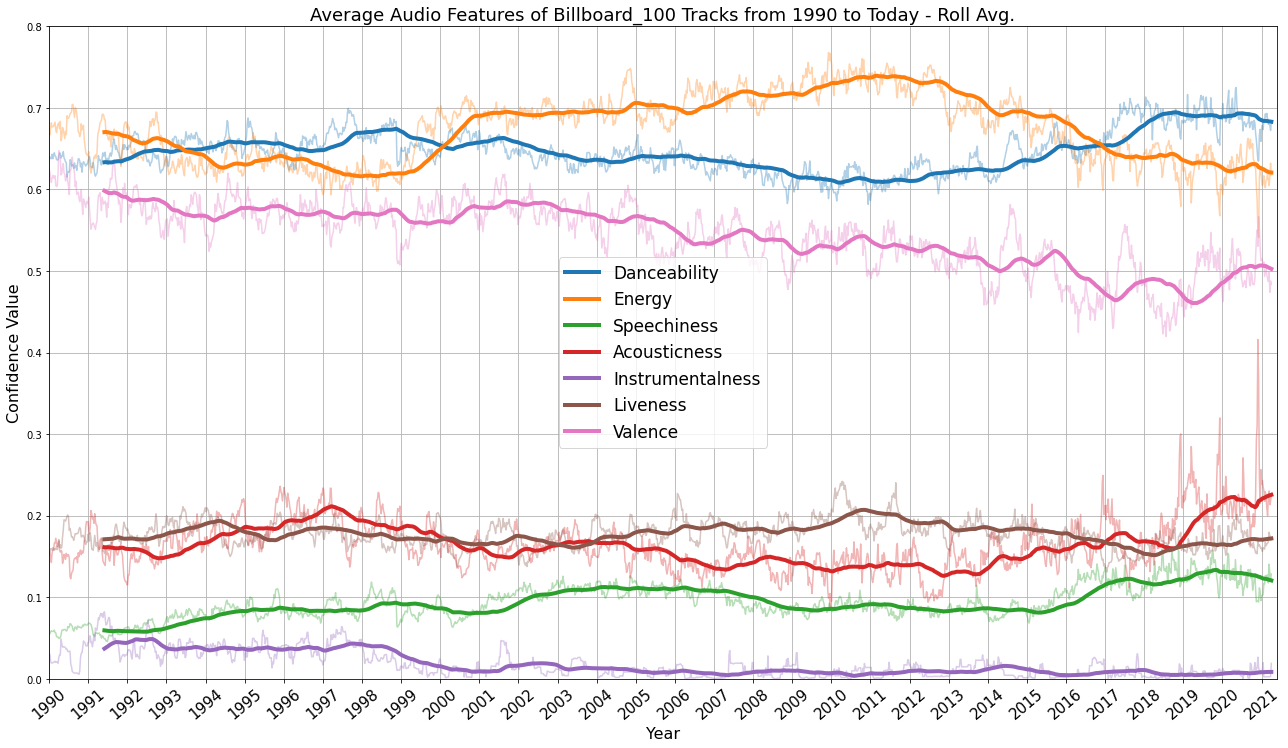

In [50]:
plt.figure(figsize=(22,12))
x_vals = rolling_avg['week']
x_ticks = np.arange(min(x_vals), max(x_vals), step=timedelta(days=366))
x_ticks_lab = [str(i).split('-')[0] for i in x_ticks]
y_vals_norm = rolling_avg[['danceability_avg','energy_avg','speechiness_avg','acousticness_avg',
                                   'instrumentalness_avg','liveness_avg','valence_avg']]
y_vals_roll = ['dance_rolling','energy_rolling','speech_rolling','acoust_rolling','instr_rolling',
                           'live_rolling','valence_rolling']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7']
plt.plot(x_vals,y_vals_norm, alpha=0.34)

labels = ['Danceability','Energy','Speechiness','Acousticness','Instrumentalness','Liveness','Valence']

for i,j in enumerate(y_vals_roll):
    plt.plot(x_vals, rolling_avg[j], alpha=1, linewidth=4, color=colors[i], label=labels[i])

plt.title('Average Audio Features of Billboard_100 Tracks from 1990 to Today - Roll Avg.', fontsize=18)
plt.ylabel('Confidence Value', fontsize=16)
plt.xlabel('Year', fontsize=16)
    
    
plt.legend(fontsize=17, loc='center')
plt.ylim(0.0,0.8)
plt.xlim(min(x_vals),max(x_vals)+timedelta(50))
plt.xticks(x_ticks,x_ticks_lab, rotation=40, fontsize=15)
plt.grid(zorder=3)
plt.show()

In [51]:
avg_features.head()

,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
0,0.635219,0.672281,-9.773062,0.054600,0.154677,0.029802,0.155859,0.625260,115.922844,1990-01-06
1,0.638968,0.666684,-9.781326,0.055008,0.151400,0.030139,0.153061,0.621674,116.558505,1990-01-13
2,0.639589,0.675137,-9.552053,0.057159,0.151506,0.021584,0.159429,0.613589,116.782663,1990-01-20
3,0.637883,0.681745,-9.437330,0.058898,0.142577,0.019172,0.159479,0.608713,117.435128,1990-01-27
4,0.643105,0.676611,-9.439842,0.057981,0.153985,0.019497,0.157777,0.613432,118.637379,1990-02-03


In [52]:
avg_features = avg_features.reset_index()
avg_features.head()

,index,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
0,0,0.635219,0.672281,-9.773062,0.054600,0.154677,0.029802,0.155859,0.625260,115.922844,1990-01-06
1,1,0.638968,0.666684,-9.781326,0.055008,0.151400,0.030139,0.153061,0.621674,116.558505,1990-01-13
2,2,0.639589,0.675137,-9.552053,0.057159,0.151506,0.021584,0.159429,0.613589,116.782663,1990-01-20
3,3,0.637883,0.681745,-9.437330,0.058898,0.142577,0.019172,0.159479,0.608713,117.435128,1990-01-27
4,4,0.643105,0.676611,-9.439842,0.057981,0.153985,0.019497,0.157777,0.613432,118.637379,1990-02-03


# Investigating Volatility Per Year
using pandas subtraction and numpy as two different methods to achieve the same result

In [53]:
difference_df = avg_features.groupby(avg_features['week'].dt.year).max() - avg_features.groupby(avg_features['week'].dt.year).min()
difference_df.head(3)

,index,danceability_avg,energy_avg,loudness_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,liveness_avg,valence_avg,tempo_avg,week
week,,,,,,,,,,,
1990,51,0.031112,0.061520,0.754691,0.018017,0.070059,0.043366,0.047859,0.078153,6.478383,357 days
1991,51,0.045404,0.072385,1.386344,0.022999,0.086897,0.061622,0.038467,0.085342,5.062053,357 days
1992,51,0.050939,0.065891,0.978755,0.018210,0.054056,0.056384,0.039722,0.067021,9.045089,357 days


In [54]:
difference_np_df = avg_features.groupby(avg_features['week'].dt.year).agg(np.ptp)
difference_np_df = difference_np_df.rename(columns={'danceability_avg':'danceability_dif','energy_avg':'energy_dif',
                                                   'loudness_avg':'loudness_dif','speechiness_avg':'speechiness_diff',
                                                   'acousticness_avg':'acousticness_dif',
                                                    'instrumentalness_avg':'instrumentalness_dif',
                                                   'liveness_avg':'liveness_dif','valence_avg':'valence_dif',
                                                   'tempo_avg':'tempo_dif','week':'year-length'}).reset_index()

In [55]:
difference_np_df = difference_np_df.rename(columns={'week':'year'})
difference_np_df

,year,index,danceability_dif,energy_dif,loudness_dif,speechiness_diff,acousticness_dif,instrumentalness_dif,liveness_dif,valence_dif,tempo_dif,year-length
0,1990,51,0.031112,0.061520,0.754691,0.018017,0.070059,0.043366,0.047859,0.078153,6.478383,357 days
1,1991,51,0.045404,0.072385,1.386344,0.022999,0.086897,0.061622,0.038467,0.085342,5.062053,357 days
2,1992,51,0.050939,0.065891,0.978755,0.018210,0.054056,0.056384,0.039722,0.067021,9.045089,357 days
3,1993,51,0.042939,0.027870,1.217962,0.016759,0.049187,0.024628,0.036235,0.061748,8.228404,357 days
4,1994,52,0.046370,0.055118,1.001953,0.024664,0.061623,0.029131,0.059796,0.096000,11.482349,364 days
5,1995,51,0.055027,0.047641,0.636729,0.040570,0.080468,0.046254,0.045226,0.057416,9.383577,357 days
6,1996,51,0.043720,0.038295,0.774700,0.023728,0.048504,0.038896,0.042906,0.052135,6.920727,357 days
7,1997,51,0.049551,0.041290,1.326060,0.035231,0.096932,0.047114,0.047020,0.079378,8.583956,357 days
8,1998,51,0.059255,0.043717,0.572565,0.055341,0.057299,0.037928,0.046657,0.093162,6.913951,357 days
9,1999,51,0.028480,0.094735,0.886350,0.033514,0.072693,0.022622,0.050575,0.092111,8.574570,357 days


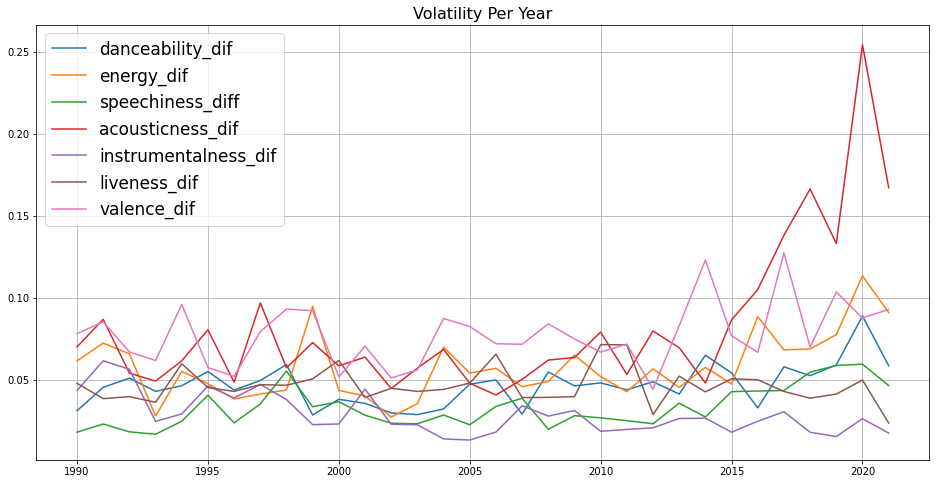

In [95]:
plt.figure(figsize=(16,8))
x_vals = difference_np_df['year']
y_vals = ['danceability_dif','energy_dif','speechiness_diff',
                           'acousticness_dif','instrumentalness_dif',
                           'liveness_dif','valence_dif']
for i in y_vals:
    plt.plot(x_vals, difference_np_df[i])

plt.legend([i for i in y_vals], fontsize=17)
plt.title(fontsize=16, label="Volatility Per Year")
plt.grid(zorder=3)
plt.show()

# Investigating Number of Weeks a Song Charts

In [57]:
billboard_songs = pd.read_csv('Clean_Billboard.csv')
billboard_songs['date'] = pd.to_datetime(billboard_songs['date'])
billboard_songs.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,0.0,1,1
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,0.0,2,1
2,1958-08-04,3,Splish Splash,Bobby Darin,0.0,3,1
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,0.0,4,1
4,1958-08-04,5,When,Kalin Twins,0.0,5,1


In [58]:
all_rank = billboard_songs.groupby(['song','artist']).min()['rank']
all_count = billboard_songs.groupby(['song','artist']).count()['date']
all_count = all_count.reset_index()
all_billboard = all_count.merge(all_rank, how='left', on=['song','artist'])
all_billboard['track'] = all_billboard['song'] + all_billboard['artist']

# DataFrame for All of Billboard 100 History
### Count of weeks charted, and highest rank hit

In [59]:
all_billboard = all_billboard.drop(['song','artist'], axis=1)
all_billboard = all_billboard.rename(columns={'rank':'peak_rank','date':'total_weeks'})

all_billboard

,total_weeks,peak_rank,track
0,20,22,#1Nelly
1,5,82,#1 Dee JayGoody Goody
2,12,9,#9 DreamJohn Lennon
3,16,15,#BeautifulMariah Carey Featuring Miguel
4,2,92,#NAME?Bill Black's Combo
...,...,...,...
29320,9,44,til Its Time To Say GoodbyeJonathan Cain
29321,3,37,whoa (mind in awe)XXXTENTACION
29322,13,65,whoknowsMusiq
29323,15,45,www.memoryAlan Jackson


# DataFrame for OldTimes to 1990

In [60]:
filt2 = billboard_songs[billboard_songs['date']<='1990-01-01']

old_1 = filt2.groupby(['song','artist']).min()['rank']
old_2 = filt2.groupby(['song','artist']).count()['date']
old_1 = old_1.reset_index()
old_tracks = old_1.merge(old_2, how='left', on=['song','artist'])
old_tracks['track'] = old_tracks['song'] + old_tracks['artist']

old_tracks = old_tracks.drop(['song','artist'], axis=1)
old_tracks = old_tracks.rename(columns={'rank':'peak_rank','date':'total_weeks'})

old_tracks

,peak_rank,total_weeks,track
0,82,5,#1 Dee JayGoody Goody
1,9,12,#9 DreamJohn Lennon
2,92,2,#NAME?Bill Black's Combo
3,76,5,(1-2-3-4-5-6-7) Count The DaysInez & Charlie Foxx
4,88,4,(A Ship Will Come) Ein Schiff Wird KommenLale ...
...,...,...,...
17181,8,13,Zip-A-Dee Doo-DahBob B. Soxx And The Blue Jeans
17182,11,12,Zorba The GreekHerb Alpert & The Tijuana Brass
17183,84,5,til I Can Make It On My OwnTammy Wynette
17184,44,9,til Its Time To Say GoodbyeJonathan Cain


# DataFrame for Billboard 100 History since 1990
### Count of weeks charted, and highest rank hit

In [61]:
filt = billboard_songs[billboard_songs['date']>='1990-01-01']

duration_chart = filt.groupby(['song','artist']).count()['date']
duration_chart = duration_chart.reset_index()

In [62]:
filt = billboard_songs[billboard_songs['date']>='1990-01-01']
true_peak = filt.groupby(['song','artist']).min()['rank']
true_peak = true_peak.reset_index()

In [63]:
nineties = true_peak.merge(duration_chart, how='left', on=['song','artist'])
nineties = nineties.rename(columns={'rank':'peak_rank','date':'total_weeks'})
nineties['track'] = nineties['song'] +' by '+ nineties['artist']
nineties = nineties.drop(['song','artist'], axis=1)
nineties.sort_values('total_weeks', ascending=False).head()

,peak_rank,total_weeks,track
8315,3,87,Radioactive by Imagine Dragons
8752,17,79,Sail by AWOLNATION
5343,6,76,Im Yours by Jason Mraz
1275,1,72,Blinding Lights by The Weeknd
4531,2,69,How Do I Live by LeAnn Rimes


In [64]:
nineties['total_weeks'].describe()

count    12266.000000
mean        13.329529
std         10.438639
min          1.000000
25%          3.000000
50%         13.000000
75%         20.000000
max         87.000000
Name: total_weeks, dtype: float64

In [65]:
nineties['peak_rank'].describe()

count    12266.000000
mean        47.556661
std         29.908000
min          1.000000
25%         20.000000
50%         48.000000
75%         73.000000
max        100.000000
Name: peak_rank, dtype: float64

# Box Plots

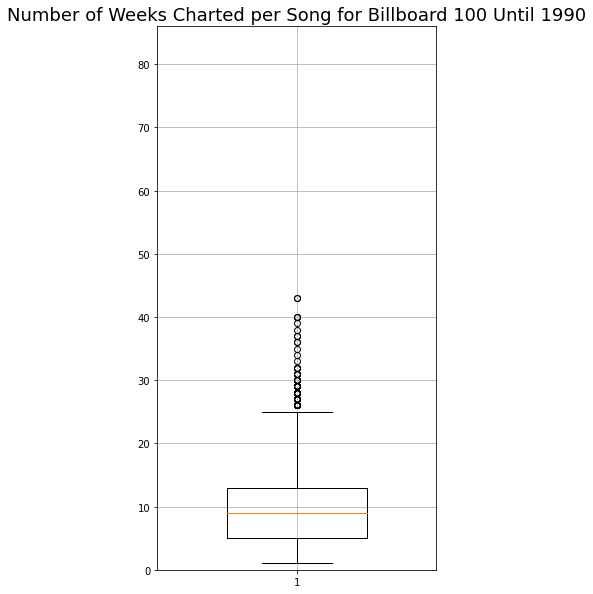

In [66]:
plt.figure(figsize=(5,10))
x = old_tracks['peak_rank']
y = old_tracks['total_weeks']
plt.boxplot(y, widths=0.5)
plt.grid(zorder=3)

plt.title('Number of Weeks Charted per Song for Billboard 100 Until 1990',fontsize=18)
plt.ylim(0,86)
plt.show()

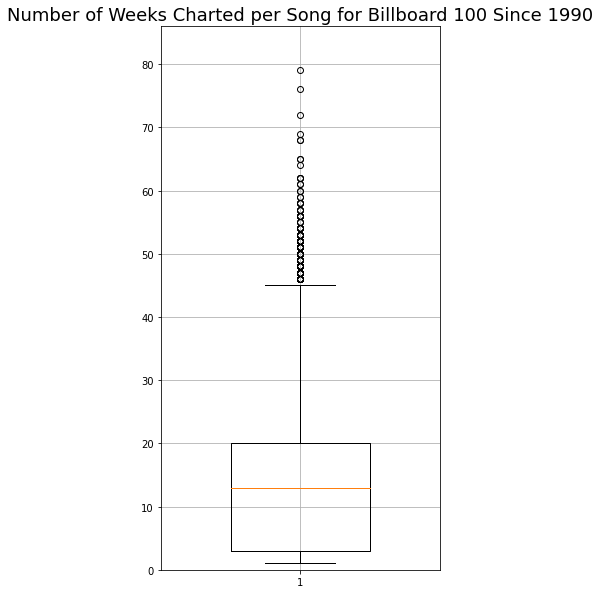

In [67]:
plt.figure(figsize=(5,10))
x = nineties['peak_rank']
y = nineties['total_weeks']
plt.boxplot(y, widths=0.5)
plt.grid(zorder=3)


plt.ylim(0,86)

plt.title('Number of Weeks Charted per Song for Billboard 100 Since 1990',fontsize=18)

plt.show()

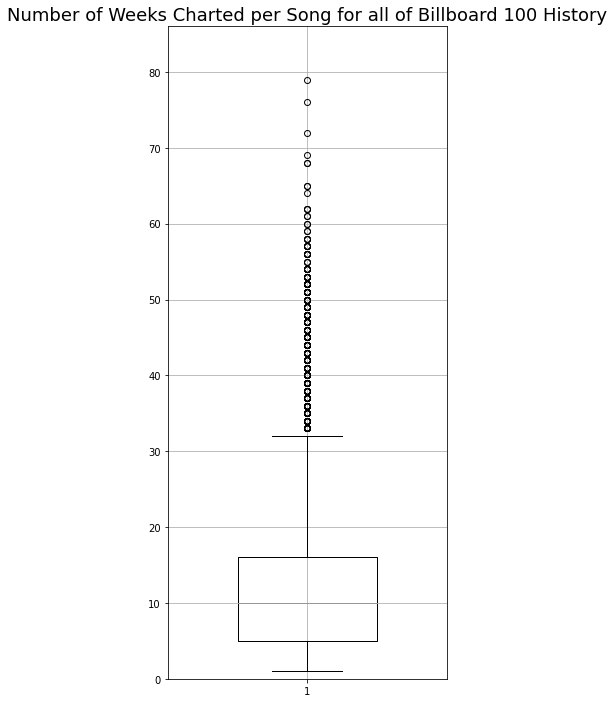

In [68]:
plt.figure(figsize=(5,12))
x = all_billboard['peak_rank']
y = all_billboard['total_weeks']
plt.boxplot(y, widths=0.5)
plt.grid(zorder=3)

plt.ylim(0,86)

plt.title('Number of Weeks Charted per Song for all of Billboard 100 History',fontsize=18)
plt.show()

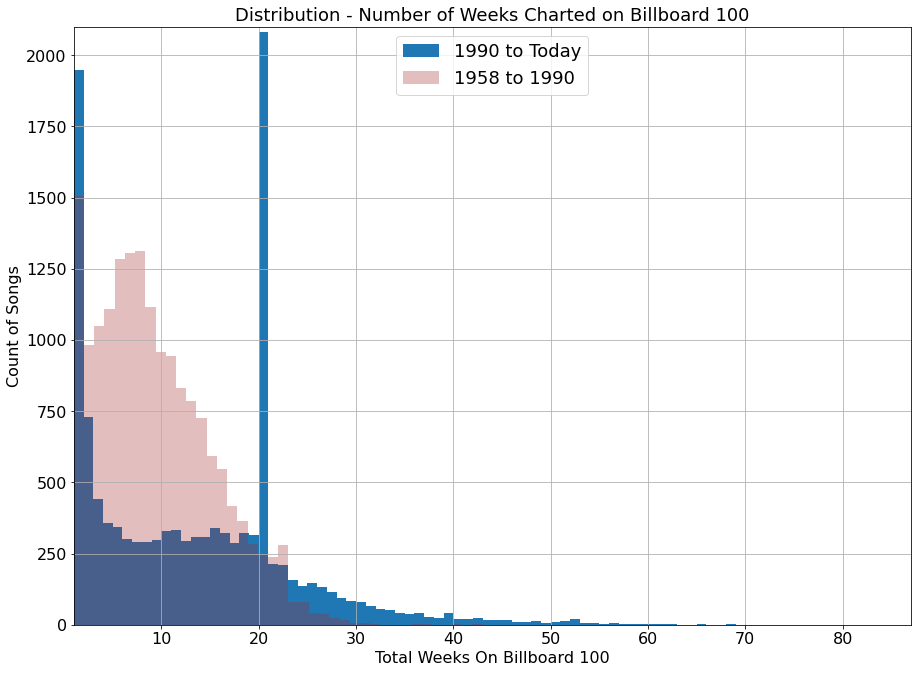

In [69]:
plt.figure(figsize=(15,11))
a = old_tracks['total_weeks']
b = nineties['total_weeks']
plt.hist(b, bins=86, alpha=1,label="1990 to Today", color="C0")
plt.hist(a, color='brown', bins=40, alpha=0.3, label='1958 to 1990')
plt.xlabel('Total Weeks On Billboard 100', fontsize=16)
plt.ylabel('Count of Songs',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(1,87)
plt.ylim(0,2100)
#b.plot(kind='kde', color='red', linewidth=4)
plt.grid(zorder=3)
plt.legend(fontsize=18, loc='upper center')
plt.title('Distribution - Number of Weeks Charted on Billboard 100',fontsize=18)
plt.show()

In [70]:
pd.set_option("display.max_rows",25)

In [71]:
print(nineties.groupby('total_weeks').count()['track'])

total_weeks
1     1948
2      730
3      443
4      357
5      343
      ... 
69       1
72       1
76       1
79       1
87       1
Name: track, Length: 70, dtype: int64


In [72]:
nineties[nineties['total_weeks']==20].sort_values('track')

,peak_rank,total_weeks,track
0,22,20,#1 by Nelly
10,67,20,(I Could Only) Whisper Your Name by Harry Conn...
11,55,20,(I Hate) Everything About You by Three Days Grace
12,35,20,(I Know I Got) Skillz by Shaquille O'Neal
20,34,20,(Kissed You) Good Night by Gloriana
...,...,...,...
12214,33,20,Youre My Better Half by Keith Urban
12215,74,20,Youre My Everything by Anita Baker
12216,56,20,Youre Not Alone by Olive
12223,5,20,Youre The One by SWV


# How do Spotify Audio Features Compare across songs that stay on the charts longer/chart higher?

In [73]:
all_tracks.head(2)

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.00269,0.063,0.365,101.967
1,Rhythm Nation,Janet Jackson,2,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.10900,0.375,0.676,109.116


In [74]:
track_features = all_tracks.drop(['peak_rank','total_weeks','weeks'], axis=1).copy()
track_features.head(2)

,song,artist,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Another Day In Paradise,Phil Collins,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.00269,0.063,0.365,101.967
1,Rhythm Nation,Janet Jackson,4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.10900,0.375,0.676,109.116


In [75]:
track_features['track'] = track_features['song'] + ' by ' + track_features['artist']
track_features = track_features.drop(['song','artist'], axis=1)
track_features.head(5)

,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track
0,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.0630,0.365,101.967,Another Day In Paradise by Phil Collins
1,4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.3750,0.676,109.116,Rhythm Nation by Janet Jackson
2,5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.1580,0.267,130.465,Dont Know Much by Linda Ronstadt (Featuring Aa...
3,21qnJAMtzC6S5SESuqQLEK,0.885,0.844,-9.225,0.0733,0.0147,0.000004,0.0494,0.715,124.602,Pump Up The Jam by Technotronic Featuring Felly
4,3hK26G5cYhJ9KjcUy1aBRk,0.773,0.893,-4.768,0.0340,0.0827,0.000002,0.0984,0.971,121.370,With Every Beat Of My Heart by Taylor Dayne


In [76]:
feats_nineties = track_features.merge(nineties, how='left', on='track')
feats_nineties.head()

,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track,peak_rank,total_weeks
0,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.0630,0.365,101.967,Another Day In Paradise by Phil Collins,1.0,9.0
1,4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.3750,0.676,109.116,Rhythm Nation by Janet Jackson,2.0,9.0
2,5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.1580,0.267,130.465,Dont Know Much by Linda Ronstadt (Featuring Aa...,3.0,12.0
3,21qnJAMtzC6S5SESuqQLEK,0.885,0.844,-9.225,0.0733,0.0147,0.000004,0.0494,0.715,124.602,Pump Up The Jam by Technotronic Featuring Felly,2.0,12.0
4,3hK26G5cYhJ9KjcUy1aBRk,0.773,0.893,-4.768,0.0340,0.0827,0.000002,0.0984,0.971,121.370,With Every Beat Of My Heart by Taylor Dayne,5.0,7.0


In [77]:
feats_nineties = feats_nineties.dropna()
feats_nineties['peak_rank'] = feats_nineties['peak_rank'].apply(lambda x: int(x))
feats_nineties['total_weeks'] = feats_nineties['total_weeks'].apply(lambda x: int(x))

feats_nineties.head()

,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track,peak_rank,total_weeks
0,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.0630,0.365,101.967,Another Day In Paradise by Phil Collins,1,9
1,4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.3750,0.676,109.116,Rhythm Nation by Janet Jackson,2,9
2,5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.1580,0.267,130.465,Dont Know Much by Linda Ronstadt (Featuring Aa...,3,12
3,21qnJAMtzC6S5SESuqQLEK,0.885,0.844,-9.225,0.0733,0.0147,0.000004,0.0494,0.715,124.602,Pump Up The Jam by Technotronic Featuring Felly,2,12
4,3hK26G5cYhJ9KjcUy1aBRk,0.773,0.893,-4.768,0.0340,0.0827,0.000002,0.0984,0.971,121.370,With Every Beat Of My Heart by Taylor Dayne,5,7


# Cutting for Avg. Feature Value based on total weeks

In [78]:
labels = ['1 to 10','11 to 20','21 to 30','31 and up']
bins = [0,10,20,30,90]
feats_nineties['range'] = pd.cut(feats_nineties['total_weeks'], bins=bins, labels=labels)
feats_nineties.head()

,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track,peak_rank,total_weeks,range
0,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.0630,0.365,101.967,Another Day In Paradise by Phil Collins,1,9,1 to 10
1,4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.3750,0.676,109.116,Rhythm Nation by Janet Jackson,2,9,1 to 10
2,5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.1580,0.267,130.465,Dont Know Much by Linda Ronstadt (Featuring Aa...,3,12,11 to 20
3,21qnJAMtzC6S5SESuqQLEK,0.885,0.844,-9.225,0.0733,0.0147,0.000004,0.0494,0.715,124.602,Pump Up The Jam by Technotronic Featuring Felly,2,12,11 to 20
4,3hK26G5cYhJ9KjcUy1aBRk,0.773,0.893,-4.768,0.0340,0.0827,0.000002,0.0984,0.971,121.370,With Every Beat Of My Heart by Taylor Dayne,5,7,1 to 10


In [79]:
avg_per_bin = feats_nineties.groupby('range').mean()[['danceability','energy','speechiness','acousticness',
                                                      'instrumentalness','liveness','valence','loudness','tempo']]
avg_per_bin = avg_per_bin.reset_index()
avg_per_bin

,range,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo
0,1 to 10,0.637400,0.664785,0.117768,0.190078,0.022547,0.188582,0.500673,-6.748497,122.252872
1,11 to 20,0.639604,0.682379,0.093276,0.161840,0.019440,0.182769,0.546343,-6.779191,120.432797
2,21 to 30,0.663458,0.659572,0.103968,0.162506,0.010066,0.175688,0.545464,-6.828201,119.108510
3,31 and up,0.652708,0.669295,0.076086,0.174882,0.011027,0.161940,0.541982,-6.196474,120.227542


# Cutting for peak rank

In [80]:
labels = ['1 to 10','11 to 20','21 to 30','31 to 40','41 to 50','51 to 60','61 to 70','71 to 80','81 to 90','90 to 100']
bins = [0,10,20,30,40,50,60,70,80,90,101]
feats_nineties['rank_bins'] = pd.cut(feats_nineties['peak_rank'], bins=bins, labels=labels)
feats_nineties.head()

,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track,peak_rank,total_weeks,range,rank_bins
0,1NCuYqMc8hKMb4cpNTcJbD,0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.0630,0.365,101.967,Another Day In Paradise by Phil Collins,1,9,1 to 10,1 to 10
1,4nTYxxF8iWBq54LO3dBUie,0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.3750,0.676,109.116,Rhythm Nation by Janet Jackson,2,9,1 to 10,1 to 10
2,5z3ZDMP02xF33yCvPFnct3,0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.1580,0.267,130.465,Dont Know Much by Linda Ronstadt (Featuring Aa...,3,12,11 to 20,1 to 10
3,21qnJAMtzC6S5SESuqQLEK,0.885,0.844,-9.225,0.0733,0.0147,0.000004,0.0494,0.715,124.602,Pump Up The Jam by Technotronic Featuring Felly,2,12,11 to 20,1 to 10
4,3hK26G5cYhJ9KjcUy1aBRk,0.773,0.893,-4.768,0.0340,0.0827,0.000002,0.0984,0.971,121.370,With Every Beat Of My Heart by Taylor Dayne,5,7,1 to 10,1 to 10


In [81]:
avg_per_bin = feats_nineties.groupby('rank_bins').mean()[['danceability','energy','speechiness','acousticness',
                                                      'instrumentalness','liveness','valence','loudness','tempo']]
avg_per_bin = avg_per_bin.reset_index()
avg_per_bin

,rank_bins,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo
0,1 to 10,0.664629,0.660579,0.097700,0.171177,0.015398,0.176569,0.552573,-6.808143,119.102422
1,11 to 20,0.645576,0.661802,0.102417,0.168676,0.015498,0.180827,0.522634,-6.810621,119.970126
2,21 to 30,0.642418,0.676925,0.098899,0.170166,0.019197,0.192105,0.539424,-6.740289,120.229465
3,31 to 40,0.634384,0.671568,0.095808,0.178885,0.021187,0.181697,0.518761,-6.598803,120.449940
4,41 to 50,0.633964,0.669458,0.096661,0.177742,0.015429,0.182365,0.522989,-6.733589,122.767554
5,51 to 60,0.628973,0.678451,0.100953,0.177556,0.015633,0.186045,0.517634,-6.745932,122.398492
6,61 to 70,0.636254,0.675416,0.107565,0.175987,0.020235,0.183026,0.516444,-6.691422,122.151694
7,71 to 80,0.639538,0.671597,0.109996,0.177380,0.023877,0.181079,0.513414,-6.895523,120.567881
8,81 to 90,0.640144,0.680885,0.114726,0.168561,0.023581,0.188084,0.523071,-6.711301,122.650767
9,90 to 100,0.640281,0.677895,0.119710,0.182960,0.025679,0.184982,0.522637,-6.562138,121.422051


In [82]:
dance_avg = feats_nineties['danceability'].mean()
energy_avg = feats_nineties['energy'].mean()
speech_avg = feats_nineties['speechiness'].mean()
acoust_avg = feats_nineties['acousticness'].mean()
instr_avg = feats_nineties['instrumentalness'].mean()
live_avg = feats_nineties['liveness'].mean()
val_avg = feats_nineties['valence'].mean()

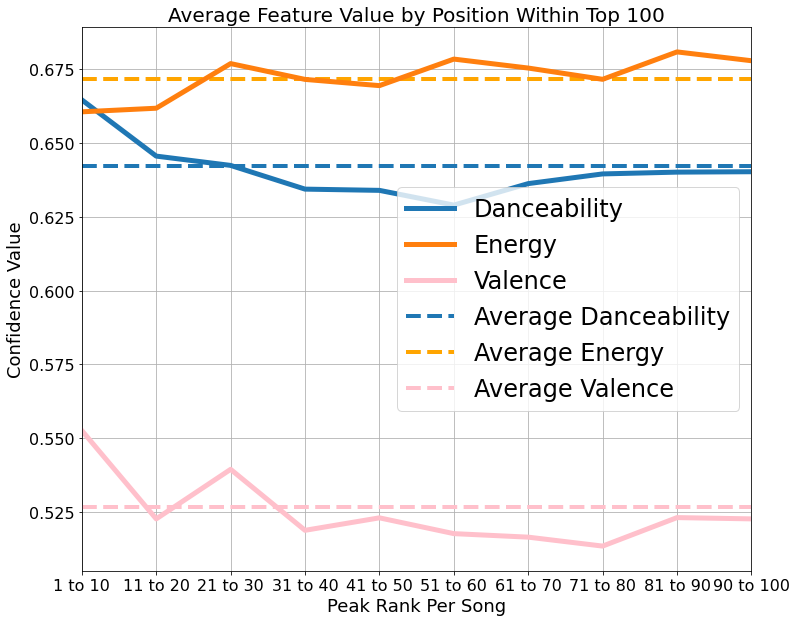

In [83]:
plt.figure(figsize=(12,10))

x_vals = avg_per_bin['rank_bins']
y_vals = avg_per_bin['danceability']

plt.plot(x_vals, y_vals, label='Danceability', linewidth=5)
plt.hlines(dance_avg,min(x_vals),max(x_vals), linestyles='dashed', label='Average Danceability', linewidth=4)

plt.plot(x_vals, avg_per_bin['energy'], label='Energy', linewidth=5)
plt.hlines(energy_avg, min(x_vals),max(x_vals), linestyles='dashed', label='Average Energy', color='orange', linewidth=4)

plt.plot(x_vals, avg_per_bin['valence'], label='Valence', linewidth=5, color='pink')
plt.hlines(val_avg, min(x_vals),max(x_vals), linestyles='dashed', label='Average Valence', color='pink', linewidth=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Peak Rank Per Song',fontsize=18)
plt.ylabel('Confidence Value',fontsize=18)

plt.xlim(min(x_vals),max(x_vals))
plt.title('Average Feature Value by Position Within Top 100',fontsize=20)
plt.legend(fontsize=24)
plt.grid()
plt.show()

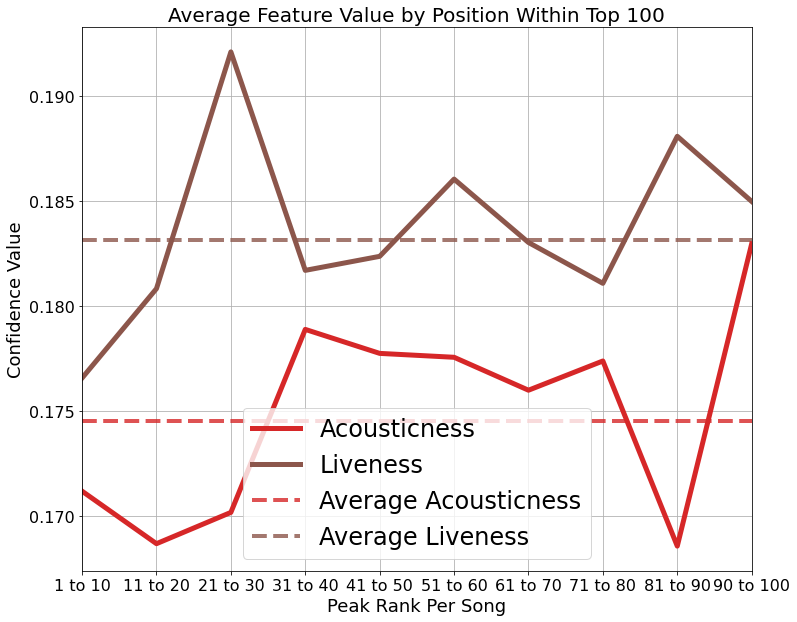

In [84]:
plt.figure(figsize=(12,10))



plt.plot(x_vals, avg_per_bin['acousticness'], label='Acousticness', linewidth=5, color='tab:red')
plt.hlines(acoust_avg,min(x_vals),max(x_vals), linestyles='dashed', label='Average Acousticness', linewidth=4, 
           color='tab:red',alpha=0.8)

plt.plot(x_vals, avg_per_bin['liveness'], label='Liveness', linewidth=5, color='tab:brown')
plt.hlines(live_avg, min(x_vals),max(x_vals), linestyles='dashed', label='Average Liveness', color='tab:brown', linewidth=4,
          alpha=0.8)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Peak Rank Per Song',fontsize=18)
plt.ylabel('Confidence Value',fontsize=18)

plt.xlim(min(x_vals),max(x_vals))
plt.title('Average Feature Value by Position Within Top 100',fontsize=20)
plt.legend(fontsize=24)
plt.grid()
plt.show()

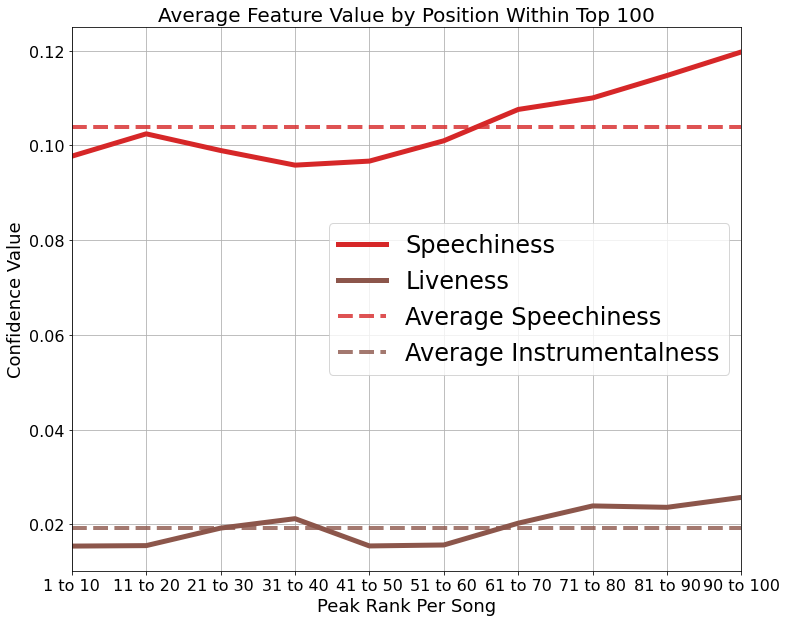

In [85]:
plt.figure(figsize=(12,10))



plt.plot(x_vals, avg_per_bin['speechiness'], label='Speechiness', linewidth=5, color='tab:red')
plt.hlines(speech_avg,min(x_vals),max(x_vals), linestyles='dashed', label='Average Speechiness', linewidth=4, 
           color='tab:red',alpha=0.8)

plt.plot(x_vals, avg_per_bin['instrumentalness'], label='Liveness', linewidth=5, color='tab:brown')
plt.hlines(instr_avg, min(x_vals),max(x_vals), linestyles='dashed', label='Average Instrumentalness', color='tab:brown', linewidth=4,
          alpha=0.8)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Peak Rank Per Song',fontsize=18)
plt.ylabel('Confidence Value',fontsize=18)

plt.xlim(min(x_vals),max(x_vals))
plt.title('Average Feature Value by Position Within Top 100',fontsize=20)
plt.legend(fontsize=24)
plt.grid()
plt.show()

# What makes a #1 Song?
Investigating the top10 vs the bottom 90

In [86]:
number_ones = all_tracks[all_tracks['peak_rank']<=10]
number_ones = number_ones.drop(['spotify_id','tempo'],axis=1)
number_ones.head(3)

,song,artist,peak_rank,total_weeks,weeks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,Another Day In Paradise,Phil Collins,1,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",0.780,0.565,-7.320,0.0306,0.7360,0.002690,0.063,0.365
1,Rhythm Nation,Janet Jackson,2,9,"['1990-01-06', '1990-01-13', '1990-01-20', ...",0.633,0.931,-7.752,0.0686,0.0504,0.109000,0.375,0.676
2,Dont Know Much,Linda Ronstadt (Featuring Aaron Neville),2,12,"['1990-01-06', '1990-01-13', '1990-01-20', ...",0.401,0.285,-11.005,0.0327,0.6570,0.000011,0.158,0.267


In [87]:
number_ones = number_ones.explode('weeks')
number_ones['weeks'] = pd.to_datetime(number_ones['weeks'])
number_ones

,song,artist,peak_rank,total_weeks,weeks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,Another Day In Paradise,Phil Collins,1,9,1990-01-06,0.780,0.565,-7.320,0.0306,0.736,0.002690,0.063,0.365
0,Another Day In Paradise,Phil Collins,1,9,1990-01-13,0.780,0.565,-7.320,0.0306,0.736,0.002690,0.063,0.365
0,Another Day In Paradise,Phil Collins,1,9,1990-01-20,0.780,0.565,-7.320,0.0306,0.736,0.002690,0.063,0.365
0,Another Day In Paradise,Phil Collins,1,9,1990-01-27,0.780,0.565,-7.320,0.0306,0.736,0.002690,0.063,0.365
0,Another Day In Paradise,Phil Collins,1,9,1990-02-03,0.780,0.565,-7.320,0.0306,0.736,0.002690,0.063,0.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12525,Deja Vu,Olivia Rodrigo,8,3,2021-05-01,0.439,0.610,-7.236,0.1160,0.593,0.000011,0.341,0.172
12533,Rapstar,Polo G,1,2,2021-04-24,0.789,0.536,-6.862,0.2420,0.410,0.000000,0.129,0.437
12533,Rapstar,Polo G,1,2,2021-05-01,0.789,0.536,-6.862,0.2420,0.410,0.000000,0.129,0.437
12534,Kiss Me More,Doja Cat Featuring SZA,7,2,2021-04-24,0.762,0.701,-3.541,0.0286,0.235,0.000158,0.123,0.742


In [88]:
number_ones.drop('peak_rank', axis=1).describe()

,total_weeks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
count,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000,7795.000000
mean,24.795253,0.670579,0.650018,-6.280172,0.100099,0.188445,0.011537,0.175233,0.515572
std,12.117831,0.139347,0.169560,2.318268,0.101057,0.219459,0.071340,0.124251,0.234479
min,1.000000,0.133000,0.148000,-16.492000,0.024400,0.000185,0.000000,0.032700,0.038200
25%,18.000000,0.590000,0.524000,-7.648000,0.036100,0.026500,0.000000,0.096800,0.341000
50%,22.000000,0.683000,0.653000,-5.961000,0.057700,0.086900,0.000000,0.124000,0.508000
75%,32.000000,0.761000,0.786000,-4.706000,0.113000,0.294000,0.000033,0.210000,0.695000
max,58.000000,0.964000,0.989000,-1.190000,0.649000,0.966000,0.847000,0.847000,0.971000


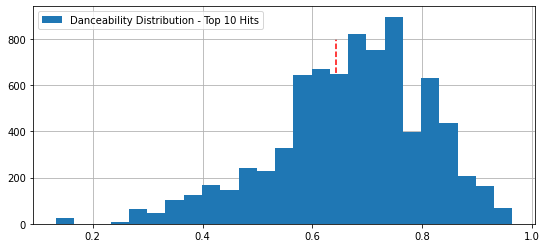

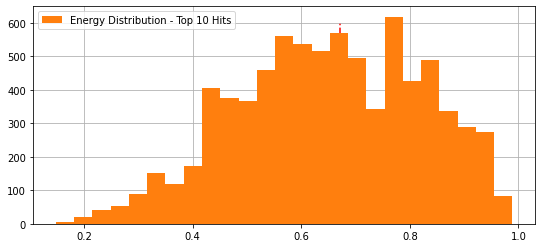

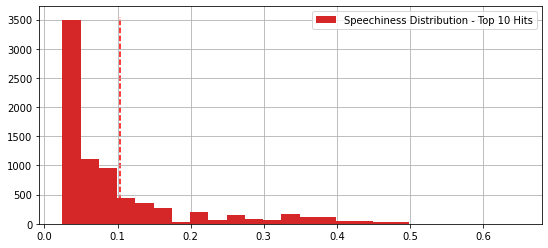

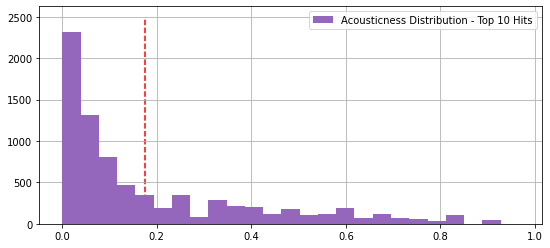

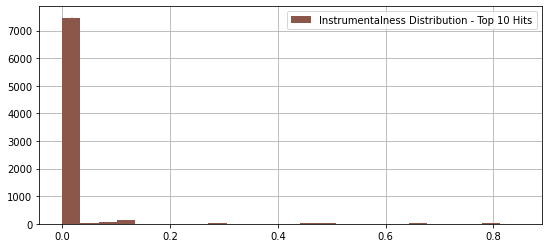

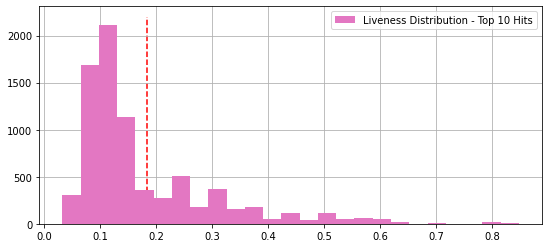

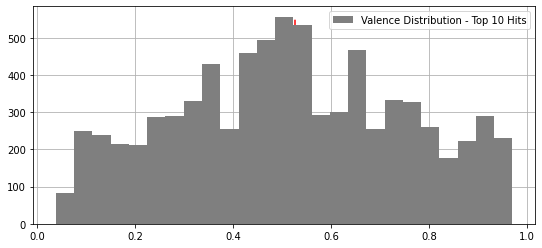

In [89]:
fig, dance = plt.subplots(figsize=(9,4))
fig, energy = plt.subplots(figsize=(9,4))
fig, speech = plt.subplots(figsize=(9,4))
fig, acoust = plt.subplots(figsize=(9,4))
fig, inst = plt.subplots(figsize=(9,4))
fig, live = plt.subplots(figsize=(9,4))
fig, valence = plt.subplots(figsize=(9,4))

colors = ['C0','C1','C2','C3','C4','C5','C6','C7']

bins = 25
density = False
## ---------------------------------------------------------------
dance.hist(number_ones['danceability'], bins=bins, zorder=3.5, density=density, color='C0',
          label='Danceability Distribution - Top 10 Hits')
dance.vlines(dance_avg,0,800, linestyles='dashed', color='r',zorder=1.5)
dance.grid(zorder=6.5)
dance.legend()


## ---------------------------------------------------------------
energy.hist(number_ones['energy'], bins=bins, zorder=3.5, density=density, color='C1',
            label='Energy Distribution - Top 10 Hits')
energy.vlines(energy_avg,0,600, linestyles='dashed', color='r',zorder=1.5)

energy.grid(zorder=6.5)
energy.legend()


## ---------------------------------------------------------------
speech.hist(number_ones['speechiness'], bins=bins, zorder=3.5, density=density, color='C3',
            label='Speechiness Distribution - Top 10 Hits')
speech.vlines(speech_avg,0,3550, linestyles='dashed', color='r',zorder=1.5)

speech.grid(zorder=6.5)
speech.legend()


## ---------------------------------------------------------------
acoust.hist(number_ones['acousticness'], bins=bins, zorder=3.5, density=density, color='C4',
            label='Acousticness Distribution - Top 10 Hits')
acoust.vlines(acoust_avg,0,2500, linestyles='dashed', color='r',zorder=1.5)

acoust.grid(zorder=6.5)
acoust.legend()


## ---------------------------------------------------------------
inst.hist(number_ones['instrumentalness'], bins=bins, zorder=3.5, density=density, color='C5',
            label='Instrumentalness Distribution - Top 10 Hits')
inst.vlines(instr_avg,0,7500, linestyles='dashed', color='r',zorder=1.5)

inst.grid(zorder=6.5)
inst.legend()


## ---------------------------------------------------------------
live.hist(number_ones['liveness'], bins=bins, zorder=3.5, density=density, color='C6',
            label='Liveness Distribution - Top 10 Hits')
live.vlines(live_avg,0,2200, linestyles='dashed', color='r',zorder=1.5)

live.grid(zorder=6.5)
live.legend()


## ---------------------------------------------------------------
valence.hist(number_ones['valence'], bins=bins, zorder=3.5, density=density, color='C7',
          label='Valence Distribution - Top 10 Hits')
valence.vlines(val_avg,0,550, linestyles='dashed', color='r',zorder=1.5)

valence.grid(zorder=6.5)
valence.legend()
plt.show()

In [90]:
not_ones = all_tracks[(all_tracks['peak_rank'] > 10)]
not_ones = not_ones.explode('weeks')
not_ones['weeks'] = pd.to_datetime(not_ones['weeks'])
not_ones.head(2)

,song,artist,peak_rank,total_weeks,weeks,spotify_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
11,Swing The Mood,Jive Bunny & The Mastermixers,12,10,1990-01-06,3Aimpqxpvmz7jhJlNnEd5c,0.865,0.512,-13.376,0.0521,0.049,0.0173,0.201,0.879,92.512
11,Swing The Mood,Jive Bunny & The Mastermixers,12,10,1990-01-13,3Aimpqxpvmz7jhJlNnEd5c,0.865,0.512,-13.376,0.0521,0.049,0.0173,0.201,0.879,92.512


# Loudness

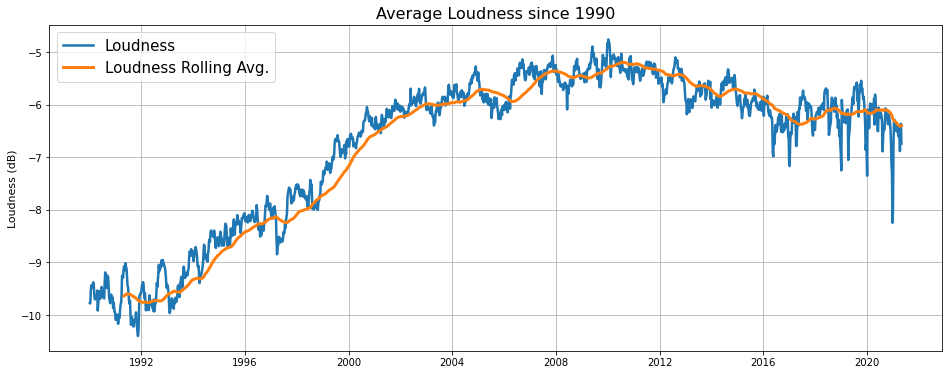

In [131]:
plt.figure(figsize=(16,6))

x_vals = avg_features['week']
y_vals = avg_features['loudness_avg']

plt.plot(x_vals, y_vals, linewidth=2.5, label="Loudness")
plt.plot(x_vals, y_vals.rolling(window=70).mean(), linewidth=3, label="Loudness Rolling Avg.")


plt.legend(fontsize=15)
plt.ylabel('Loudness (dB)', fontsize=11)
plt.title(label="Average Loudness since 1990", fontsize=16)
plt.grid()
plt.show()